# Text Clustering SatuSehat News Article

Data yang digunakan untuk proses clustering ini adalah data yang berisi konten berita terkait SatuSehat yang telah dibersihkan dan telah dilakukan stemming (menggunakan library Sastrawi).

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
# Upload File
from google.colab import files
uploaded = files.upload()

satusehat_news_df = pd.read_excel(list(uploaded.keys())[0])

Saving satusehat_news_df_cleaned.xlsx to satusehat_news_df_cleaned.xlsx


In [ ]:
satusehat_news_df

,link,judul,tanggal,portal,content,tags,status,tahun,wordCount,content_without_stopwords,wordcount_after_stopwords,content_stem_without_stopwords,wordcount_stem_without_stopwords,content_lemmatized,wordcount_lemmatized
0,https://cahayasiang.id/dinilai-peduli-lindungi...,"dinilai PeduliLindungi para pekerja, bpjs kete...",2024-09-22,Cahaya Siang,"dinilai PeduliLindungi para pekerja, bpjs ke...",Tidak ada tags,success,2024,481,dinilai PeduliLindungi pekerja bpjs ketenagake...,277,nilai pedulilindungi kerja bpjs ketenagakerjaa...,277,dinilai PeduliLindungi pekerja bpjs ketenagake...,277
1,https://memorandum.disway.id/read/114165/pemer...,pemerintah tingkatkan layanan haji dan umrah m...,2024-09-15,Memorandum.co.id,okt okt polrestabes surabaya menit pasuru...,"ketua fk patuh jatim,vaksin maningitis,satu se...",success,2024,458,okt okt polrestabes surabaya menit pasuruan ja...,286,okt okt polrestabes surabaya menit pasuruan ja...,286,okt okt polrestabes surabaya menit pasuruan ja...,286
2,https://www.bicaranetwork.com/kesehatan/295134...,tutorial cara isi formulir SatuSehat pasca pul...,2024-09-06,Bicara Network,bicaranetwork.com - guna menanggulangi penyeba...,"mpox, Satu Sehat, cara isi formulir",success,2024,355,bicaranetwork menanggulangi penyebaran penyaki...,203,bicaranetwork tanggulang sebar sakit cacar mon...,203,bicaranetwork menanggulangi penyebaran penyaki...,203
3,https://www.genpi.co/kesehatan/245752/bandara-...,bandara i gusti ngurah rai wajibkan penumpang ...,2024-09-06,GenPI.co,genpi.co - bandara i gusti ngurah rai bali mew...,"Berita terkini mpox, cacar monyet, Monkeypox,...",success,2024,217,genpi co bandara i gusti ngurah rai bali mewaj...,131,genpi co bandara i gusti ngurah rai bal wajib ...,131,genpi co bandara i gusti ngurah rai bali mewaj...,131
4,https://newsindonesia.co.id/read/berita-sumene...,"transformasi digital, rsud moh anwar sumenep b...",2024-02-01,newsindonesia.co.id,news indonesia . foto: direktur rumah saki...,Tidak ada tags,success,2024,539,news indonesia foto direktur rumah sakit daera...,292,news indonesia foto direktur rumah sakit daera...,292,news indonesia foto direktur rumah sakit daera...,292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,https://www.beritamerdekaonline.com/2021/07/pe...,perumahan tas blok m & n motto satgas “PeduliL...,2021-07-21,Berita Merdeka Online,"sidoarjo, beritamerdekaonline.com – kegiatan m...",Tidak ada tags,success,2021,691,sidoarjo beritamerdekaonline kegiatan mulia wa...,393,sidoarjo beritamerdekaonline giat mulia warga ...,386,sidoarjo beritamerdekaonline kegiatan mulia wa...,393
157,https://www.idxchannel.com/economics/masih-bin...,masih bingung? ini tips mudah download dan cet...,2021-07-12,IDX Channel,– diberlakukannya kebijakan pemberlakuan pemb...,"IDX, BEI, Pasar modal, Vakinsasi",success,2021,468,diberlakukannya kebijakan pemberlakuan pembata...,264,laku bijak laku batas giat masyarakat ppkm dar...,264,diberlakukannya kebijakan pemberlakuan pembata...,264
158,https://sehatnegeriku.kemkes.go.id/baca/umum/2...,kemenkes luncurkan qr code untuk aplikasi Pedu...,2021-07-01,Sehat Negeriku,"bali, juli kementerian kesehatan (kemenkes) ...",Tidak ada tags,success,2021,741,bali juli kementerian kesehatan kemenkes pemer...,421,bal juli menteri sehat kemenkes perintah daera...,421,bali juli kementerian kesehatan kemenkes pemer...,421
159,https://www.suara.com/health/2021/01/18/114052...,cara mendapatkan vaksin covid-19 gratis dari p...,2021-01-18,Suara.com,suara.com - seperti yang telah diketahui bersa...,"cara mendapatkan vaksin Covid-19 gratis, Vaksi...",success,2021,643,suara pelaksanaan program vaksinasi covid indo...,337,suara laksana program vaksinasi covid indonesi...,337,suara pelaksanaan program vaksinasi covid indo...,337


# Clustering berdasarkan keinginan klp

- Transformasi: Menggambarkan perubahan aplikasi.
- Kebijakan: Berkaitan dengan aturan dan layanan.
- Edukasi: Fokus pada pendidikan pengguna.
- Keamanan: Menyoroti aspek keamanan aplikasi.
- Integrasi: Menyentuh teknologi dan pengintegrasian data.

## Elbow Method
Metode Elbow membantu menentukan jumlah klaster optimal, yaitu 𝑘, dengan mengamati titik di mana Within-Cluster Sum of Squares (WCSS) mulai berkurang dengan lebih lambat. Titik ini sering disebut sebagai titik "elbow" (siku), karena pada grafiknya terlihat seperti bentuk siku.

In [ ]:
# Menampilkan baris yang mengandung NaN di kolom 'content_stem_without_stopwords'
nan_rows = satusehat_news_df[satusehat_news_df['content_stem_without_stopwords'].isna()]
print(nan_rows)

Empty DataFrame
Columns: [link, judul, tanggal, portal, content, tags, status, tahun, wordCount, content_without_stopwords, wordcount_after_stopwords, content_stem_without_stopwords, wordcount_stem_without_stopwords, content_lemmatized, wordcount_lemmatized]
Index: []


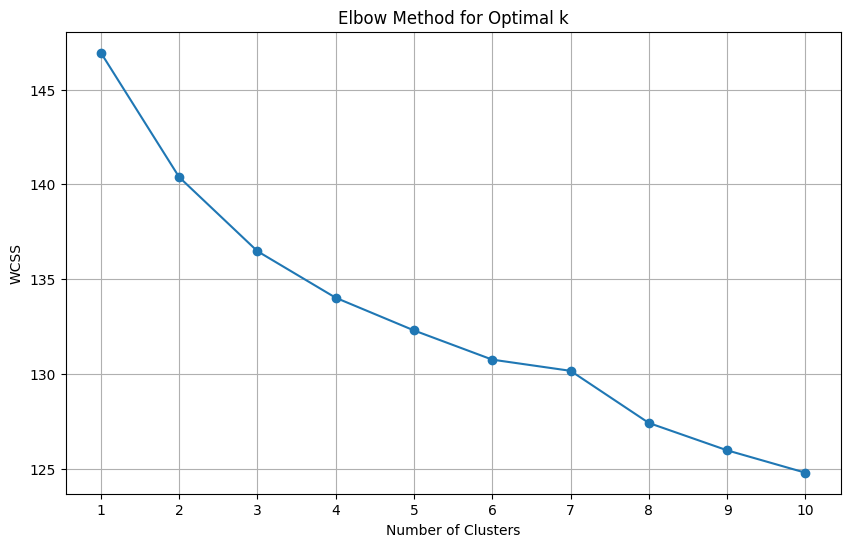

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

# Asumsikan satusehat_news_df sudah ada dan berisi kolom 'content_stem_without_stopwords'
# Siapkan data untuk TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(satusehat_news_df['content_stem_without_stopwords'])

# Tentukan rentang jumlah cluster
range_n_clusters = range(1, 11)  # Menggunakan 1 hingga 10 cluster
wcss = []

# Hitung WCSS untuk setiap jumlah cluster
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(tfidf_matrix)  # Menggunakan matrix TF-IDF
    wcss.append(kmeans.inertia_)  # Menyimpan WCSS

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range_n_clusters)
plt.grid()
plt.show()


Pada gambar di atas dapat dilihat bahwa penurunan WCSS sangat tajam dari 𝑘=1 hingga 𝑘=3. Setelah 𝑘=3, laju penurunannya mulai stabil, dan mulai sekitar 𝑘=5, pengurangan WCSS dengan setiap klaster tambahan menjadi semakin berkurang.

Oleh karena itu, dapat dikatakan bahwa **titik "elbow" optimal adalah 𝑘=3 atau 𝑘=5** (menunjukkan titik penghentian potensial lainnya, tetapi tidak sejelas 𝑘=3).

Titik elbow pada 𝑘=3 menunjukkan keseimbangan antara WCSS yang rendah dan jumlah klaster yang lebih sedikit, sehingga kemungkinan besar 𝑘=3 adalah pilihan optimal.

## Bag of Words

Bag of Words (BoW) merupakan cara untuk merepresentasikan dokumen teks (korpus) dalam bentuk vektor numerik tanpa memperhatikan urutan kata. Dalam model ini, setiap dokumen diwakili sebagai kumpulan kata-kata yang terdapat di dalamnya, dengan informasi mengenai frekuensi kemunculan kata-kata tersebut.

In [ ]:
# Membuat DataFrame baru dengan kolom yang diinginkan
satusehat_news_bow = satusehat_news_df[['link', 'judul', 'tanggal', 'portal', 'tags', 'content_stem_without_stopwords']].copy()

In [ ]:
satusehat_news_bow

,link,judul,tanggal,portal,tags,content_stem_without_stopwords
0,https://cahayasiang.id/dinilai-peduli-lindungi...,"dinilai PeduliLindungi para pekerja, bpjs kete...",2024-09-22,Cahaya Siang,Tidak ada tags,nilai pedulilindungi kerja bpjs ketenagakerjaa...
1,https://memorandum.disway.id/read/114165/pemer...,pemerintah tingkatkan layanan haji dan umrah m...,2024-09-15,Memorandum.co.id,"ketua fk patuh jatim,vaksin maningitis,satu se...",okt okt polrestabes surabaya menit pasuruan ja...
2,https://www.bicaranetwork.com/kesehatan/295134...,tutorial cara isi formulir SatuSehat pasca pul...,2024-09-06,Bicara Network,"mpox, Satu Sehat, cara isi formulir",bicaranetwork tanggulang sebar sakit cacar mon...
3,https://www.genpi.co/kesehatan/245752/bandara-...,bandara i gusti ngurah rai wajibkan penumpang ...,2024-09-06,GenPI.co,"Berita terkini mpox, cacar monyet, Monkeypox,...",genpi co bandara i gusti ngurah rai bal wajib ...
4,https://newsindonesia.co.id/read/berita-sumene...,"transformasi digital, rsud moh anwar sumenep b...",2024-02-01,newsindonesia.co.id,Tidak ada tags,news indonesia foto direktur rumah sakit daera...
...,...,...,...,...,...,...
156,https://www.beritamerdekaonline.com/2021/07/pe...,perumahan tas blok m & n motto satgas “PeduliL...,2021-07-21,Berita Merdeka Online,Tidak ada tags,sidoarjo beritamerdekaonline giat mulia warga ...
157,https://www.idxchannel.com/economics/masih-bin...,masih bingung? ini tips mudah download dan cet...,2021-07-12,IDX Channel,"IDX, BEI, Pasar modal, Vakinsasi",laku bijak laku batas giat masyarakat ppkm dar...
158,https://sehatnegeriku.kemkes.go.id/baca/umum/2...,kemenkes luncurkan qr code untuk aplikasi Pedu...,2021-07-01,Sehat Negeriku,Tidak ada tags,bal juli menteri sehat kemenkes perintah daera...
159,https://www.suara.com/health/2021/01/18/114052...,cara mendapatkan vaksin covid-19 gratis dari p...,2021-01-18,Suara.com,"cara mendapatkan vaksin Covid-19 gratis, Vaksi...",suara laksana program vaksinasi covid indonesi...


### BoW 2 Klaster

Kluster 0: 4578 kata
Kluster 1: 2 kata

Kata yang paling sering muncul dalam setiap kluster:
Kluster 0: aan, aang, abadi, abai, abbas, abdul, abdullah, abi, abidin, absensi
Kluster 1: satusehat, sehat

Silhouette Score (untuk kata dalam BoW): 0.9568333221136529
Calinski Score (untuk kata dalam BoW): 571.9194401682707
Davies Score (untuk kata dalam BoW): 0.5028683525123618


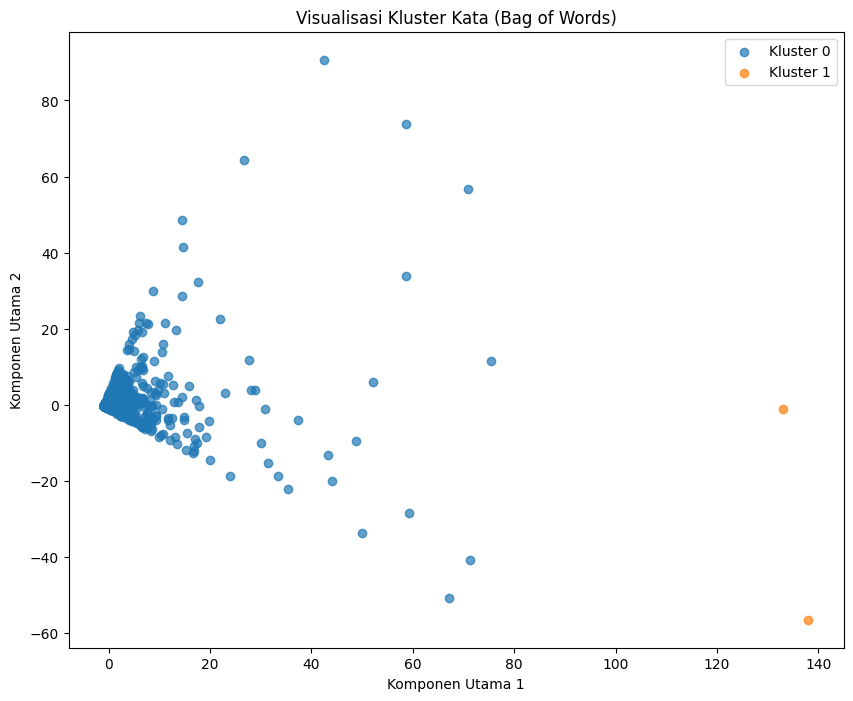

In [ ]:
# Ambil kolom 'content_stem_without_stopwords' untuk representasi BoW
documents = satusehat_news_bow['content_stem_without_stopwords']

# Menggunakan CountVectorizer untuk membuat representasi Bag of Words
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

# Transpos X untuk memiliki kata-kata sebagai baris (setiap baris mewakili vektor kata di seluruh dokumen)
X_words = X.T.toarray()  # Konversi ke matriks dens untuk kompatibilitas dengan KMeans

# Mendapatkan nama fitur kata (kosakata)
words = vectorizer.get_feature_names_out()

# Membuat DataFrame dari X_words dengan kata-kata sebagai indeks dan dokumen sebagai kolom
bow_df = pd.DataFrame(X_words, index=words)

# Menyimpan DataFrame ke file Excel dan CSV
bow_df.to_excel("bow_satusehat_news.xlsx", index=True)
bow_df.to_csv("bow_satusehat_news.csv", index=True)

# Tentukan jumlah kluster untuk kata-kata
num_clusters = 2

# Lakukan klustering KMeans pada vektor kata (BoW)
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_words)
word_cluster_labels = kmeans.labels_

# Menampilkan jumlah kata dalam setiap kluster
class_counts = Counter(word_cluster_labels)
for label, count in class_counts.items():
    print(f"Kluster {label}: {count} kata")

# Menampilkan kata yang paling sering muncul dalam setiap kluster
print("\nKata yang paling sering muncul dalam setiap kluster:")
for i in range(num_clusters):
    # Mendapatkan kata-kata dalam kluster saat ini
    cluster_words = [words[j] for j in range(len(words)) if word_cluster_labels[j] == i]

    # Menghitung frekuensi kemunculan kata dalam kluster saat ini
    word_frequencies = Counter(cluster_words)

    # Menampilkan 10 kata paling sering dalam kluster saat ini
    most_common_words = word_frequencies.most_common(10)
    print(f"Kluster {i}: {', '.join([word for word, freq in most_common_words])}")

# Mengevaluasi klustering menggunakan silhouette score
silhouette_avg = silhouette_score(X_words, word_cluster_labels)
calinski_harabasz_avg = calinski_harabasz_score(X_words, word_cluster_labels)
davies_bouldin_avg = davies_bouldin_score(X_words, word_cluster_labels)
print(f"\nSilhouette Score (untuk kata dalam BoW): {silhouette_avg}")
print(f"Calinski Score (untuk kata dalam BoW): {calinski_harabasz_avg}")
print(f"Davies Score (untuk kata dalam BoW): {davies_bouldin_avg}")

#=============================================
# Visualisasi Kluster dengan PCA
#=============================================

# Mengurangi dimensi untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_words)

# Memvisualisasikan kluster kata
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    cluster_points = X_pca[word_cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Kluster {i}', alpha=0.7)

plt.title('Visualisasi Kluster Kata (Bag of Words)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.legend()
plt.show()

### BoW 5 klaster

Kluster 3: 4420 kata
Kluster 0: 85 kata
Kluster 4: 59 kata
Kluster 2: 4 kata
Kluster 1: 12 kata

Kata yang paling sering muncul dalam setiap kluster:
Kluster 0: ade, airin, aman, ariel, aris, arsi, balikpapan, belanja, benyamin, capai
Kluster 1: data, fasyankes, integrasi, layan, masyarakat, medis, menteri, mobile, platform, satusehat
Kluster 2: aplikasi, pedulilindungi, sertifikat, vaksin
Kluster 3: aan, aang, abadi, abai, abbas, abdul, abdullah, abi, abidin, absensi
Kluster 4: akses, aku, alamsyah, angka, baca, baik, bekas, berita, call, catat

Silhouette Score (untuk kata dalam BoW): 0.7538243409058735
Calinski Score (untuk kata dalam BoW): 610.0294462340458
Davies Score (untuk kata dalam BoW): 1.7250103984997387


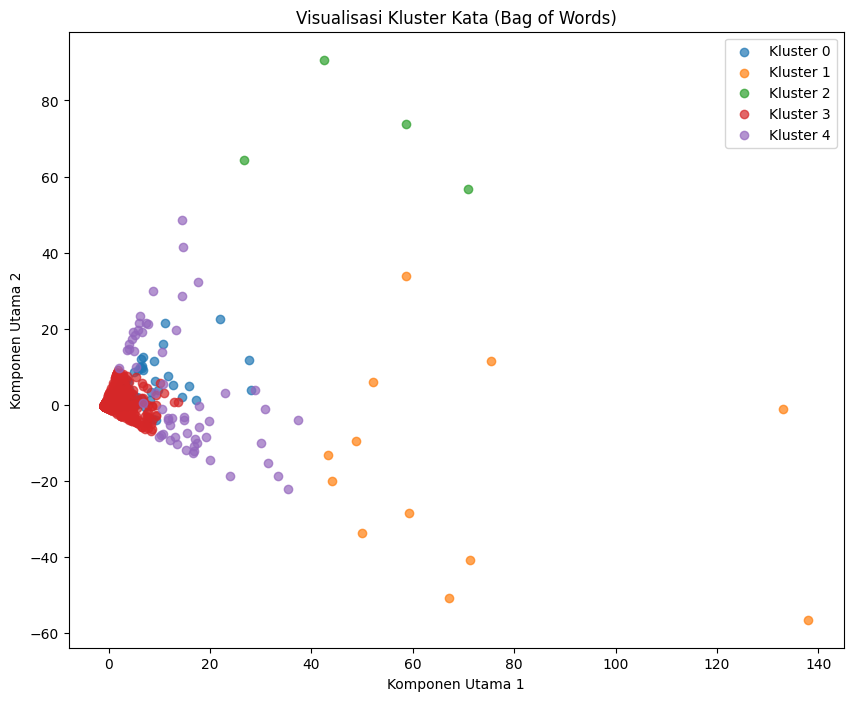

In [ ]:
# Ambil kolom 'content_stem_without_stopwords' untuk representasi BoW
documents = satusehat_news_bow['content_stem_without_stopwords']

# Menggunakan CountVectorizer untuk membuat representasi Bag of Words
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

# Transpos X untuk memiliki kata-kata sebagai baris (setiap baris mewakili vektor kata di seluruh dokumen)
X_words = X.T.toarray()  # Konversi ke matriks dens untuk kompatibilitas dengan KMeans

# Mendapatkan nama fitur kata (kosakata)
words = vectorizer.get_feature_names_out()

# Membuat DataFrame dari X_words dengan kata-kata sebagai indeks dan dokumen sebagai kolom
bow_df = pd.DataFrame(X_words, index=words)

# Menyimpan DataFrame ke file Excel dan CSV
bow_df.to_excel("bow_satusehat_news.xlsx", index=True)
bow_df.to_csv("bow_satusehat_news.csv", index=True)

# Tentukan jumlah kluster untuk kata-kata
num_clusters = 5

# Lakukan klustering KMeans pada vektor kata (BoW)
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_words)
word_cluster_labels = kmeans.labels_

# Menampilkan jumlah kata dalam setiap kluster
class_counts = Counter(word_cluster_labels)
for label, count in class_counts.items():
    print(f"Kluster {label}: {count} kata")

# Menampilkan kata yang paling sering muncul dalam setiap kluster
print("\nKata yang paling sering muncul dalam setiap kluster:")
for i in range(num_clusters):
    # Mendapatkan kata-kata dalam kluster saat ini
    cluster_words = [words[j] for j in range(len(words)) if word_cluster_labels[j] == i]

    # Menghitung frekuensi kemunculan kata dalam kluster saat ini
    word_frequencies = Counter(cluster_words)

    # Menampilkan 10 kata paling sering dalam kluster saat ini
    most_common_words = word_frequencies.most_common(10)
    print(f"Kluster {i}: {', '.join([word for word, freq in most_common_words])}")

# Mengevaluasi klustering menggunakan silhouette score
silhouette_avg = silhouette_score(X_words, word_cluster_labels)
calinski_harabasz_avg = calinski_harabasz_score(X_words, word_cluster_labels)
davies_bouldin_avg = davies_bouldin_score(X_words, word_cluster_labels)
print(f"\nSilhouette Score (untuk kata dalam BoW): {silhouette_avg}")
print(f"Calinski Score (untuk kata dalam BoW): {calinski_harabasz_avg}")
print(f"Davies Score (untuk kata dalam BoW): {davies_bouldin_avg}")

#=============================================
# Visualisasi Kluster dengan PCA
#=============================================

# Mengurangi dimensi untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_words)

# Memvisualisasikan kluster kata
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    cluster_points = X_pca[word_cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Kluster {i}', alpha=0.7)

plt.title('Visualisasi Kluster Kata (Bag of Words)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.legend()
plt.show()

## BoW (berdasarkan kode PPT)

### BoW 2 Klaster


Bag of Words:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Top terms in each cluster:
Cluster 0: aplikasi, pedulilindungi, sehat, vaksin, masyarakat, covid, data, layan, satusehat, guna
Cluster 1: sehat, satusehat, masyarakat, data, layan, aplikasi, platform, integrasi, vaksin, menteri

Silhouette Score: 0.6617621904627216
Calinski-Harabasz Score: 27.25764849714026
Davies-Bouldin Score: 1.8946016411304398


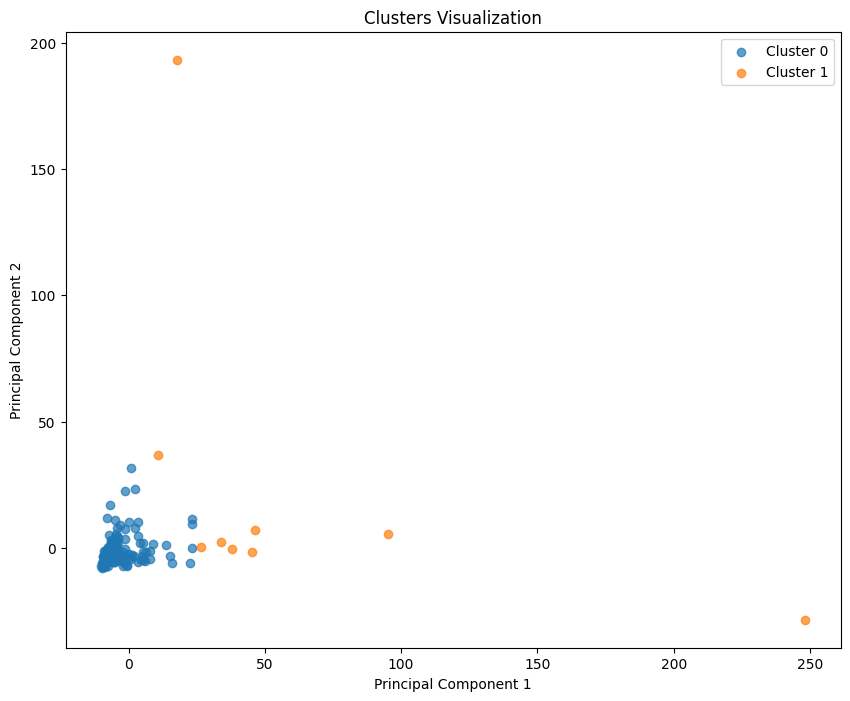

Class 0: 152 instances
Class 1: 9 instances


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from collections import Counter

# Load the preprocessed content from the DataFrame
# Assuming satusehat_news_bow is already defined and contains the relevant data
documents = satusehat_news_bow['content_stem_without_stopwords']

# Use CountVectorizer to create a bag of words representation
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

# Convert to dense array for further processing
X_dense = X.toarray()

# Save BoW to Excel and CSV
bow_df = pd.DataFrame(X_dense, columns=vectorizer.get_feature_names_out())
bow_df.to_excel("bow_satusehat_news.xlsx", index=False)
bow_df.to_csv("bow_satusehat_news.csv", index=False)

# Print the bag of words representation
print("\nBag of Words:")
print(X_dense)

# Number of clusters (you can adjust this based on your data)
num_clusters = 2

# Perform KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Get cluster labels for each document
cluster_labels = kmeans.labels_

# Print the top terms in each cluster
print("\nTop terms in each cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(num_clusters):
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]  # Print top 10 terms per cluster
    print(f"Cluster {i}: {', '.join(top_terms)}")

# Evaluate the clustering using various metrics
silhouette_avg = silhouette_score(X, cluster_labels)
calinski_harabasz_avg = calinski_harabasz_score(X_dense, cluster_labels)
davies_bouldin_avg = davies_bouldin_score(X_dense, cluster_labels)

# Print the evaluation scores
print(f"\nSilhouette Score: {silhouette_avg}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_avg}")
print(f"Davies-Bouldin Score: {davies_bouldin_avg}")

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_dense)

# Plot the clusters
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    cluster_points = X_pca[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}', alpha=0.7)

plt.title('Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Count occurrences of each cluster label
class_counts = Counter(cluster_labels)

# Print the count of each class label
for label, count in class_counts.items():
    print(f"Class {label}: {count} instances")


### BoW 5 Klaster


Bag of Words:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Top terms in each cluster:
Cluster 0: aplikasi, pedulilindungi, sehat, masyarakat, covid, vaksin, layan, data, guna, satusehat
Cluster 1: pedulilindungi, vaksin, sertifikat, aplikasi, masyarakat, masuk, balikpapan, mall, covid, daftar
Cluster 2: satusehat, fasyankes, integrasi, setiaji, platform, sehat, ri, data, medis, pasien
Cluster 3: vaksin, duduk, sertifikat, warga, dinas, hubung, sipil, pedulilindungi, masalah, muncul
Cluster 4: sehat, satusehat, aplikasi, data, layan, masyarakat, menteri, indonesia, platform, pedulilindungi

Silhouette Score: 0.4496837453307774
Calinski-Harabasz Score: 32.40728946666881
Davies-Bouldin Score: 1.2294004215902343


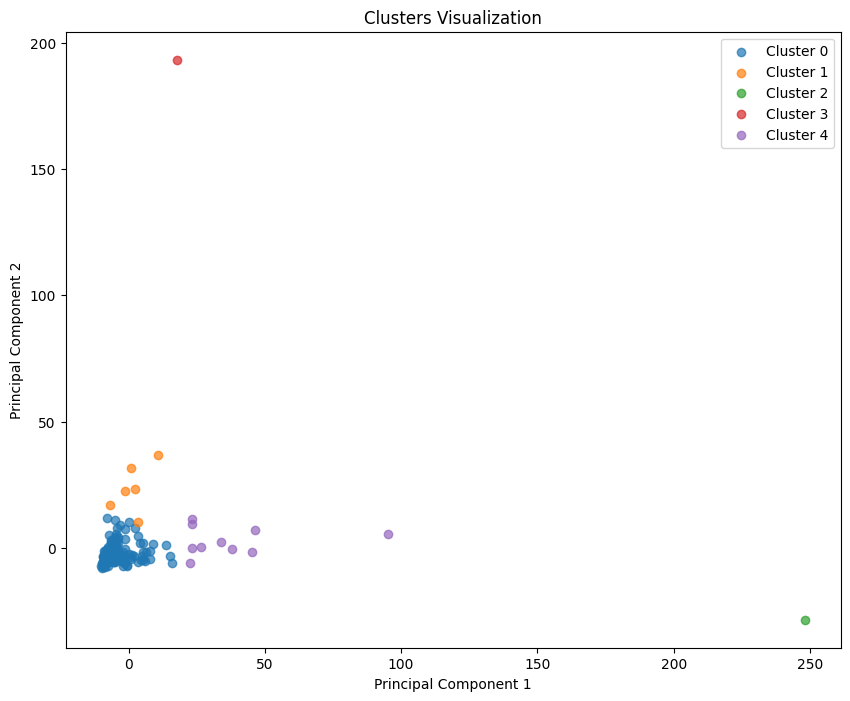

Class 0: 143 instances
Class 4: 10 instances
Class 2: 1 instances
Class 1: 6 instances
Class 3: 1 instances


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from collections import Counter

# Load the preprocessed content from the DataFrame
# Assuming satusehat_news_bow is already defined and contains the relevant data
documents = satusehat_news_bow['content_stem_without_stopwords']

# Use CountVectorizer to create a bag of words representation
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

# Convert to dense array for further processing
X_dense = X.toarray()

# Save BoW to Excel and CSV
bow_df = pd.DataFrame(X_dense, columns=vectorizer.get_feature_names_out())
bow_df.to_excel("bow_satusehat_news.xlsx", index=False)
bow_df.to_csv("bow_satusehat_news.csv", index=False)

# Print the bag of words representation
print("\nBag of Words:")
print(X_dense)

# Number of clusters (you can adjust this based on your data)
num_clusters = 5  # Set this to the desired number of clusters

# Perform KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Get cluster labels for each document
cluster_labels = kmeans.labels_

# Print the top terms in each cluster
print("\nTop terms in each cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(num_clusters):
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]  # Print top 10 terms per cluster
    print(f"Cluster {i}: {', '.join(top_terms)}")

# Evaluate the clustering using various metrics
silhouette_avg = silhouette_score(X, cluster_labels)
calinski_harabasz_avg = calinski_harabasz_score(X_dense, cluster_labels)
davies_bouldin_avg = davies_bouldin_score(X_dense, cluster_labels)

# Print the evaluation scores
print(f"\nSilhouette Score: {silhouette_avg}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_avg}")
print(f"Davies-Bouldin Score: {davies_bouldin_avg}")

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_dense)

# Plot the clusters
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    cluster_points = X_pca[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}', alpha=0.7)

plt.title('Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Count occurrences of each cluster label
class_counts = Counter(cluster_labels)

# Print the count of each class label
for label, count in class_counts.items():
    print(f"Class {label}: {count} instances")


## Cosine menggunakan BoW

### Cosine 2 Klaster

Cluster 1: 4417 words
Cluster 0: 163 words

Example words in each cluster:
Cluster 0: agenda, agustus, ahad, aksi, aktivasi, antisipasi, api, arus, barang, begal
Cluster 1: aan, aang, abadi, abai, abbas, abdul, abdullah, abi, abidin, absensi

Silhouette Score (for words): 0.1786155321675877

Calinski Score (for words): 203.54756484670813

Davies Score (for words): 1.3530615484610922


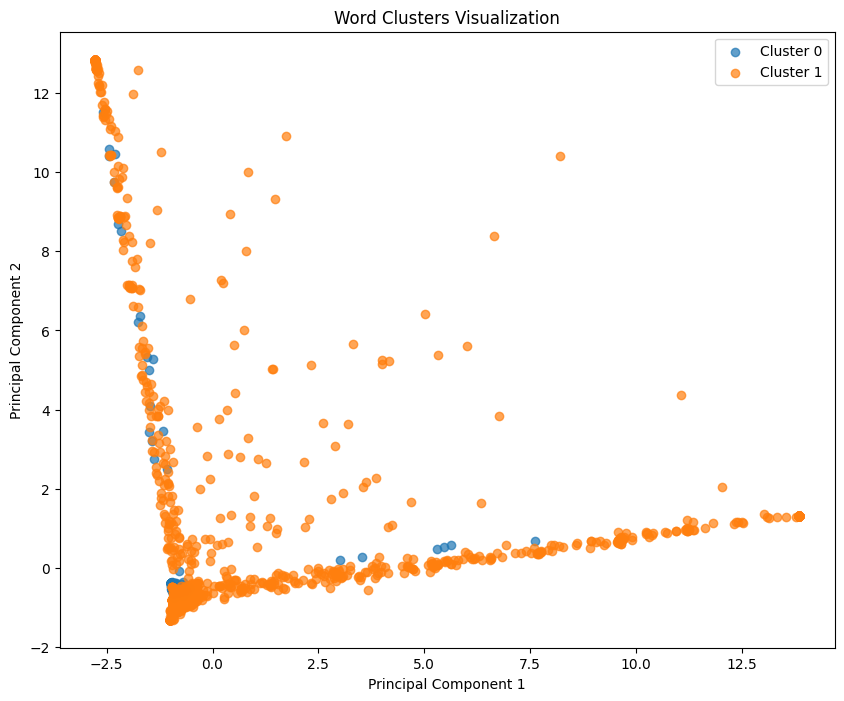

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from collections import Counter
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.pairwise import cosine_similarity

# Use 'Preprocessed_Content' column for clustering words
documents = satusehat_news_df['content_stem_without_stopwords']

# Initialize CountVectorizer to extract word-level features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

# Transpose X to have words as rows (each row representing a word vector across documents)
X_words = X.T

# Get the word feature names (vocabulary)
words = vectorizer.get_feature_names_out()

# Use cosine similarity to calculate word similarities based on document occurrences
X_similarity = cosine_similarity(X_words)

# Define number of clusters for words
num_clusters = 2

# Perform KMeans clustering on word vectors
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_similarity)
word_cluster_labels = kmeans.labels_

# Print word counts in each cluster
class_counts = Counter(word_cluster_labels)
for label, count in class_counts.items():
    print(f"Cluster {label}: {count} words")

# Print example words in each cluster
print("\nExample words in each cluster:")
for i in range(num_clusters):
    cluster_words = [words[j] for j in range(len(words)) if word_cluster_labels[j] == i]
    print(f"Cluster {i}: {', '.join(cluster_words[:10])}")  # Display first 10 words per cluster

# Evaluate clustering using silhouette score
silhouette_avg = silhouette_score(X_similarity, word_cluster_labels)
calinski_harabasz_avg = calinski_harabasz_score(X_similarity, word_cluster_labels)
davies_bouldin_avg = davies_bouldin_score(X_similarity, word_cluster_labels)
print(f"\nSilhouette Score (for words): {silhouette_avg}")
print(f"\nCalinski Score (for words): {calinski_harabasz_avg}")
print(f"\nDavies Score (for words): {davies_bouldin_avg}")

#=============================================
# Clusters Visualization with PCA
#=============================================

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_similarity)

# Plot the clusters for words
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    cluster_points = X_pca[word_cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}', alpha=0.7)

plt.title('Word Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


### Cosine 5 Klaster

Cluster 3: 3809 words
Cluster 4: 279 words
Cluster 2: 234 words
Cluster 0: 151 words
Cluster 1: 107 words

Example words in each cluster:
Cluster 0: agenda, agustus, ahad, aksi, aktivasi, antisipasi, api, arus, barang, begal
Cluster 1: ajar, all, andir, antre, apotek, as, asuransi, banget, banner, batuk
Cluster 2: achmad, ade, airin, ajah, akhlak, alpalhankam, andra, antusiasme, apartemen, apresiasi
Cluster 3: aan, aang, abadi, abai, abdul, abdullah, abi, absensi, abu, acap
Cluster 4: abbas, abidin, adil, ajal, akibat, akuntabel, alas, amanat, anggar, anggota

Silhouette Score (for words): 0.21638360515954844

Calinski Score (for words): 580.4702953978574

Davies Score (for words): 1.079646223293913


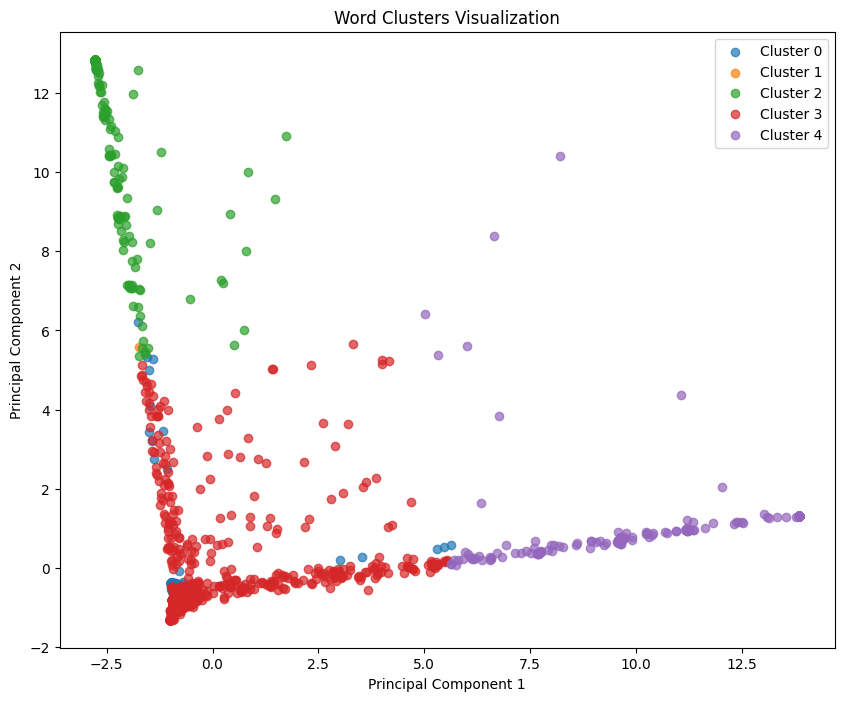

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from collections import Counter
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.pairwise import cosine_similarity

# Use 'Preprocessed_Content' column for clustering words
documents = satusehat_news_df['content_stem_without_stopwords']

# Initialize CountVectorizer to extract word-level features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

# Transpose X to have words as rows (each row representing a word vector across documents)
X_words = X.T

# Get the word feature names (vocabulary)
words = vectorizer.get_feature_names_out()

# Use cosine similarity to calculate word similarities based on document occurrences
X_similarity = cosine_similarity(X_words)

# Define number of clusters for words
num_clusters = 5

# Perform KMeans clustering on word vectors
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_similarity)
word_cluster_labels = kmeans.labels_

# Print word counts in each cluster
class_counts = Counter(word_cluster_labels)
for label, count in class_counts.items():
    print(f"Cluster {label}: {count} words")

# Print example words in each cluster
print("\nExample words in each cluster:")
for i in range(num_clusters):
    cluster_words = [words[j] for j in range(len(words)) if word_cluster_labels[j] == i]
    print(f"Cluster {i}: {', '.join(cluster_words[:10])}")  # Display first 10 words per cluster

# Evaluate clustering using silhouette score
silhouette_avg = silhouette_score(X_similarity, word_cluster_labels)
calinski_harabasz_avg = calinski_harabasz_score(X_similarity, word_cluster_labels)
davies_bouldin_avg = davies_bouldin_score(X_similarity, word_cluster_labels)
print(f"\nSilhouette Score (for words): {silhouette_avg}")
print(f"\nCalinski Score (for words): {calinski_harabasz_avg}")
print(f"\nDavies Score (for words): {davies_bouldin_avg}")

#=============================================
# Clusters Visualization with PCA
#=============================================

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_similarity)

# Plot the clusters for words
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    cluster_points = X_pca[word_cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}', alpha=0.7)

plt.title('Word Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


## Cosine BoW (Berdasarkan kode PPT)

### Cosine 2 Klaster


Bag of Words shape: (161, 4580)

Top terms in each cluster:
Cluster 0: admin, adu, alamat, aceh, address, achmad, afdba, adaptasi, adaptif, adolikasi
Cluster 1: anatara, ak, alamat, agama, amfiteater, akibat, admin, ajak, aceh, adaptif

Silhouette Score: 0.2779977658605338
Calinski-Harabasz Score: 78.84900928746515
Davies-Bouldin Score: 1.382062997379796


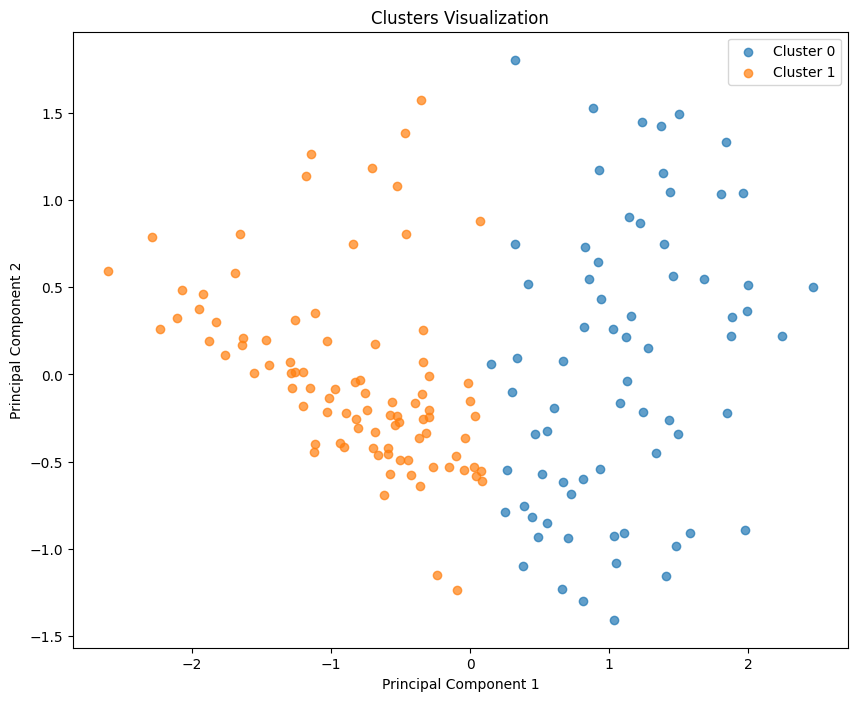

Class 1: 91 instances
Class 0: 70 instances


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from collections import Counter
from scipy.sparse import issparse

# Assuming satusehat_news_df is already defined
documents = satusehat_news_df['content_stem_without_stopwords']

# Create a CountVectorizer to create a bag of words representation
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

# Save cosine to Excel and CSV
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
bow_df.to_excel("cosine_satusehat_news.xlsx", index=False)
bow_df.to_csv("cosine_satusehat_news.csv", index=False)

# Print the bag of words shape
print("\nBag of Words shape:", X.shape)

# Calculate cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(X, X)

# Use cosine similarity for clustering
X = cosine_sim

# Number of clusters (adjust as needed)
num_clusters = 2

# Perform KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Get cluster labels for each document
cluster_labels = kmeans.labels_

# Print the top terms in each cluster (optional)
print("\nTop terms in each cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(num_clusters):
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]  # Print top 10 terms per cluster
    print(f"Cluster {i}: {', '.join(top_terms)}")

# Evaluate the clustering using various metrics
silhouette_avg = silhouette_score(X, cluster_labels)
calinski_harabasz_avg = calinski_harabasz_score(X, cluster_labels)
davies_bouldin_avg = davies_bouldin_score(X, cluster_labels)

# Print the evaluation scores
print(f"\nSilhouette Score: {silhouette_avg}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_avg}")
print(f"Davies-Bouldin Score: {davies_bouldin_avg}")

# Reduce dimensionality for visualization
if issparse(X):
    XX = X.toarray()
else:
    XX = X

pca = PCA(n_components=2)
X_pca = pca.fit_transform(XX)

# Plot the clusters
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    cluster_points = X_pca[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}', alpha=0.7)

plt.title('Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Count occurrences of each cluster label
class_counts = Counter(cluster_labels)

# Print the count of each class label
for label, count in class_counts.items():
    print(f"Class {label}: {count} instances")


### Cosine 5 Klaster


Bag of Words shape: (161, 4580)

Top terms in each cluster:
Cluster 0: alamat, amfiteater, ak, adolikasi, agama, agen, admin, achmad, adu, and
Cluster 1: ak, alamat, amfiteater, agama, anatara, akibat, ajak, agen, admin, ambon
Cluster 2: admin, adaptasi, address, adum, affandi, adu, adrianto, aceh, adrial, adopsi
Cluster 3: acap, aktivitas, aktif, akun, aktifitas, akbar, akuntabel, aktivasi, ajak, akurasi
Cluster 4: anatara, admin, adaptif, aceh, adaptasi, ahy, affandi, adhyatma, address, agenda

Silhouette Score: 0.18834059250416643
Calinski-Harabasz Score: 47.74645733625753
Davies-Bouldin Score: 1.6056994827416247


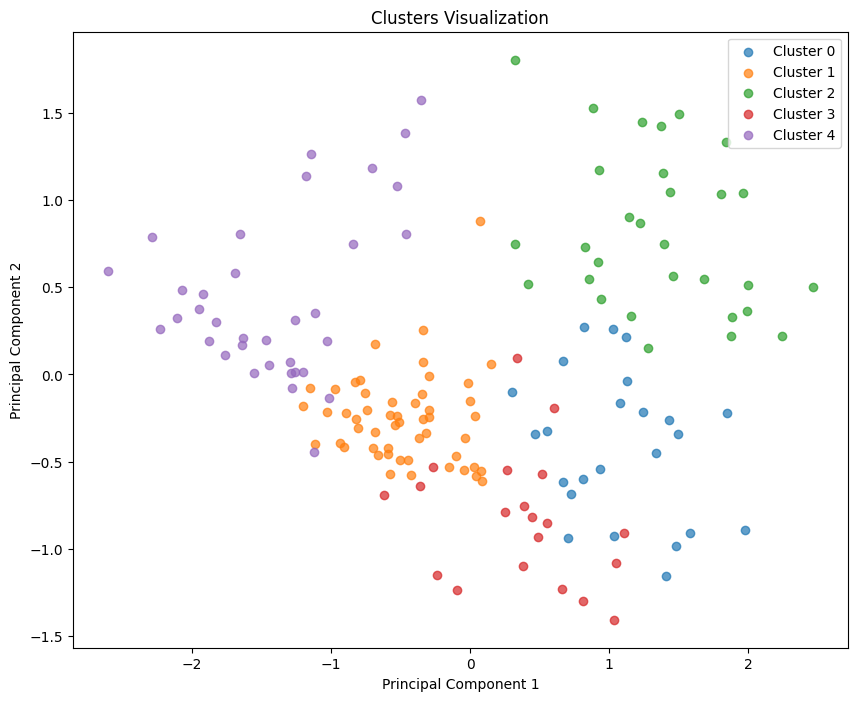

Class 4: 35 instances
Class 2: 30 instances
Class 1: 52 instances
Class 3: 20 instances
Class 0: 24 instances


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from collections import Counter
from scipy.sparse import issparse

# Assuming satusehat_news_df is already defined
documents = satusehat_news_df['content_stem_without_stopwords']

# Create a CountVectorizer to create a bag of words representation
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

# Save cosine to Excel and CSV
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
bow_df.to_excel("cosine_satusehat_news.xlsx", index=False)
bow_df.to_csv("cosine_satusehat_news.csv", index=False)

# Print the bag of words shape
print("\nBag of Words shape:", X.shape)

# Calculate cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(X, X)

# Use cosine similarity for clustering
X = cosine_sim

# Number of clusters (adjust as needed)
num_clusters = 5

# Perform KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Get cluster labels for each document
cluster_labels = kmeans.labels_

# Print the top terms in each cluster (optional)
print("\nTop terms in each cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(num_clusters):
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]  # Print top 10 terms per cluster
    print(f"Cluster {i}: {', '.join(top_terms)}")

# Evaluate the clustering using various metrics
silhouette_avg = silhouette_score(X, cluster_labels)
calinski_harabasz_avg = calinski_harabasz_score(X, cluster_labels)
davies_bouldin_avg = davies_bouldin_score(X, cluster_labels)

# Print the evaluation scores
print(f"\nSilhouette Score: {silhouette_avg}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_avg}")
print(f"Davies-Bouldin Score: {davies_bouldin_avg}")

# Reduce dimensionality for visualization
if issparse(X):
    XX = X.toarray()
else:
    XX = X

pca = PCA(n_components=2)
X_pca = pca.fit_transform(XX)

# Plot the clusters
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    cluster_points = X_pca[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}', alpha=0.7)

plt.title('Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Count occurrences of each cluster label
class_counts = Counter(cluster_labels)

# Print the count of each class label
for label, count in class_counts.items():
    print(f"Class {label}: {count} instances")


## Cosine menggunakan TF-IDF

### Cosine 2 Kluster

Cluster 1: 4464 words
Cluster 0: 116 words

Example words in each cluster:
Cluster 0: agenda, ahad, aksi, aktivasi, api, arus, breaking, bubar, carnival, cc
Cluster 1: aan, aang, abadi, abai, abbas, abdul, abdullah, abi, abidin, absensi

Silhouette Score (for words): 0.19641255266179514
Calinski-Harabasz Score (for words): 176.20356757484532
Davies-Bouldin Score (for words): 1.1611129410122583


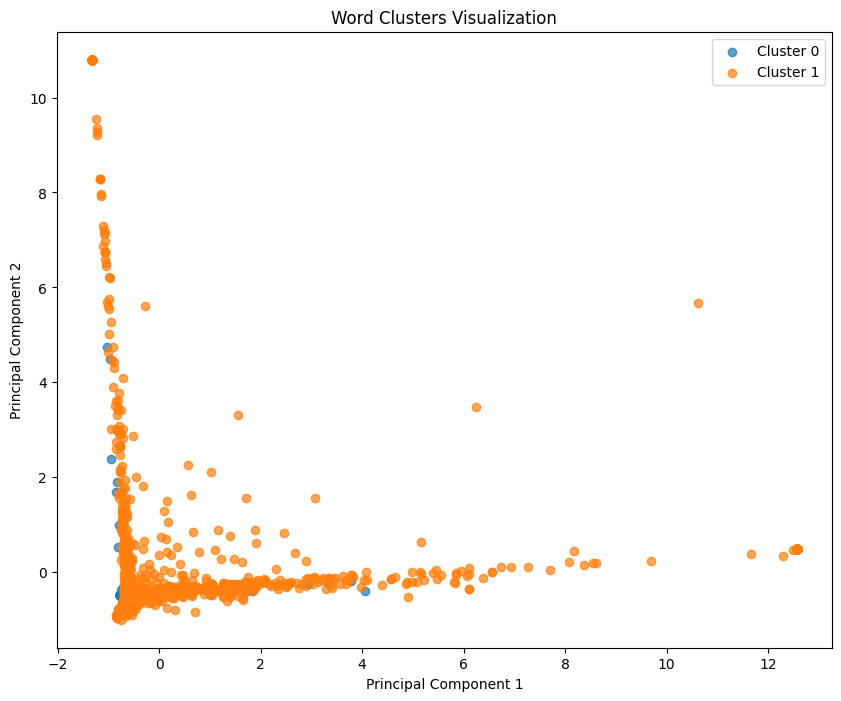

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from collections import Counter
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.pairwise import cosine_similarity

# Use 'Preprocessed_Content' column for clustering words
documents = satusehat_news_df['content_stem_without_stopwords']

# Initialize TfidfVectorizer to extract word-level features based on TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents)

# Transpose X to have words as rows (each row representing a word vector across documents)
X_words = X.T

# Get the word feature names (vocabulary)
words = vectorizer.get_feature_names_out()

# Use cosine similarity to calculate word similarities based on document occurrences
X_similarity = cosine_similarity(X_words)

# Define number of clusters for words
num_clusters = 2

# Perform KMeans clustering on word vectors
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_similarity)
word_cluster_labels = kmeans.labels_

# Print word counts in each cluster
class_counts = Counter(word_cluster_labels)
for label, count in class_counts.items():
    print(f"Cluster {label}: {count} words")

# Print example words in each cluster
print("\nExample words in each cluster:")
for i in range(num_clusters):
    cluster_words = [words[j] for j in range(len(words)) if word_cluster_labels[j] == i]
    print(f"Cluster {i}: {', '.join(cluster_words[:10])}")  # Display first 10 words per cluster

# Evaluate clustering using silhouette score
silhouette_avg = silhouette_score(X_similarity, word_cluster_labels)
calinski_harabasz_avg = calinski_harabasz_score(X_similarity, word_cluster_labels)
davies_bouldin_avg = davies_bouldin_score(X_similarity, word_cluster_labels)
print(f"\nSilhouette Score (for words): {silhouette_avg}")
print(f"Calinski-Harabasz Score (for words): {calinski_harabasz_avg}")
print(f"Davies-Bouldin Score (for words): {davies_bouldin_avg}")

#=============================================
# Clusters Visualization with PCA
#=============================================

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_similarity)

# Plot the clusters for words
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    cluster_points = X_pca[word_cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}', alpha=0.7)

plt.title('Word Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

### Cosine 5 Kluster

Cluster 1: 4070 words
Cluster 4: 181 words
Cluster 2: 141 words
Cluster 3: 72 words
Cluster 0: 116 words

Example words in each cluster:
Cluster 0: agenda, ahad, aksi, aktivasi, api, arus, breaking, bubar, carnival, cc
Cluster 1: aan, aang, abadi, abai, abdul, abdullah, abi, absensi, abu, acap
Cluster 2: achmad, ade, airin, ajah, akhlak, alpalhankam, andra, antusiasme, aren, argya
Cluster 3: adrianto, alat, appbi, aries, asyik, balikpapan, bioskop, bioskopbukapedulilindungiscan, blackpink, bsb
Cluster 4: abbas, abidin, ajal, akuntabel, anggar, asi, asia, association, associations, bachrun

Silhouette Score (for words): 0.18025915790795016
Calinski-Harabasz Score (for words): 378.24604490403095
Davies-Bouldin Score (for words): 1.027000147855353


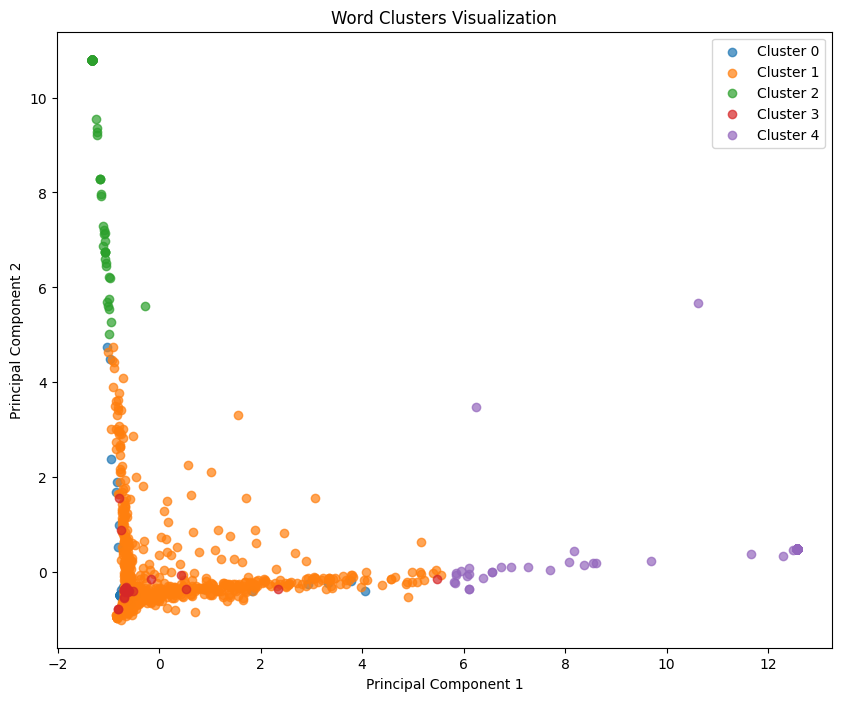

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from collections import Counter
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.pairwise import cosine_similarity

# Use 'Preprocessed_Content' column for clustering words
documents = satusehat_news_df['content_stem_without_stopwords']

# Initialize TfidfVectorizer to extract word-level features based on TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents)

# Transpose X to have words as rows (each row representing a word vector across documents)
X_words = X.T

# Get the word feature names (vocabulary)
words = vectorizer.get_feature_names_out()

# Use cosine similarity to calculate word similarities based on document occurrences
X_similarity = cosine_similarity(X_words)

# Define number of clusters for words
num_clusters = 5

# Perform KMeans clustering on word vectors
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_similarity)
word_cluster_labels = kmeans.labels_

# Print word counts in each cluster
class_counts = Counter(word_cluster_labels)
for label, count in class_counts.items():
    print(f"Cluster {label}: {count} words")

# Print example words in each cluster
print("\nExample words in each cluster:")
for i in range(num_clusters):
    cluster_words = [words[j] for j in range(len(words)) if word_cluster_labels[j] == i]
    print(f"Cluster {i}: {', '.join(cluster_words[:10])}")  # Display first 10 words per cluster

# Evaluate clustering using silhouette score
silhouette_avg = silhouette_score(X_similarity, word_cluster_labels)
calinski_harabasz_avg = calinski_harabasz_score(X_similarity, word_cluster_labels)
davies_bouldin_avg = davies_bouldin_score(X_similarity, word_cluster_labels)
print(f"\nSilhouette Score (for words): {silhouette_avg}")
print(f"Calinski-Harabasz Score (for words): {calinski_harabasz_avg}")
print(f"Davies-Bouldin Score (for words): {davies_bouldin_avg}")

#=============================================
# Clusters Visualization with PCA
#=============================================

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_similarity)

# Plot the clusters for words
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    cluster_points = X_pca[word_cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}', alpha=0.7)

plt.title('Word Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

## TF-IDF

### TF-IDF 2 Klaster


Silhouette Score: 0.0247
Calinski-Harabasz Score: 7.4335
Davies-Bouldin Score: 3.5921


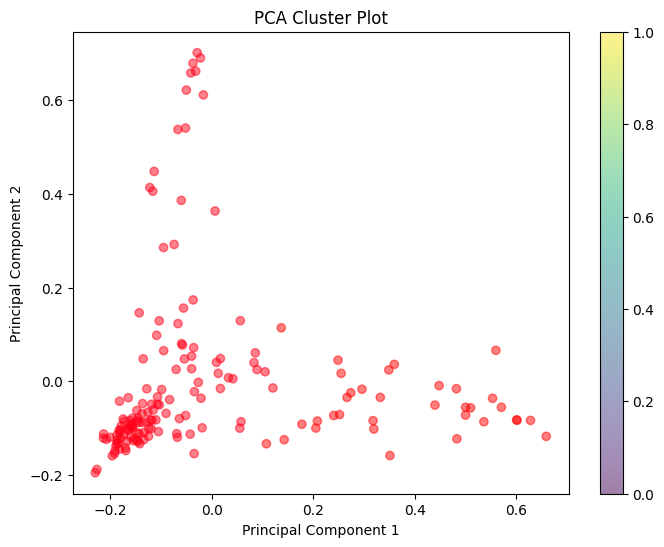

Cluster 0: satusehat, aplikasi, mobile, sehat, data, pedulilindungi, platform, transformasi, rekam, ubah
Cluster 1: pedulilindungi, aplikasi, vaksin, sertifikat, masyarakat, covid, sehat, layan, vaksinasi, data


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.cm as cm

# Prepare the data for TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(satusehat_news_df['content_stem_without_stopwords'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Set the number of clusters
n_clusters = 2

# Perform KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(tfidf_df)

# Evaluate clustering
silhouette_avg = silhouette_score(tfidf_df, clusters)
calinski_harabasz_avg = calinski_harabasz_score(tfidf_df, clusters)
davies_bouldin_avg = davies_bouldin_score(tfidf_df, clusters)

# Print the evaluation scores
print(f"\nSilhouette Score: {silhouette_avg:.4f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_avg:.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin_avg:.4f}")

def plot_pca(data, labels):
    # Convert DataFrame to NumPy array
    data_array = data.to_numpy()

    # Perform PCA on the entire dataset
    pca = PCA(n_components=2).fit_transform(data_array)

    # Create color labels based on clusters
    label_subset = [cm.hsv(i / max(labels)) for i in labels]

    # Plot PCA results
    plt.figure(figsize=(8, 6))
    plt.scatter(pca[:, 0], pca[:, 1], c=label_subset, alpha=0.5)
    plt.title('PCA Cluster Plot')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar()
    plt.show()

# Plot PCA
plot_pca(tfidf_df, clusters)

# Function to get top words for each cluster
def get_top_words_per_cluster(model, vectorizer, n_words=10):
    # Get the cluster centers
    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()

    # Display top words for each cluster
    top_words = {}
    for i in range(model.n_clusters):
        top_words[i] = [terms[ind] for ind in order_centroids[i, :n_words]]

    return top_words

# Get top words for each cluster
top_words_per_cluster = get_top_words_per_cluster(kmeans, tfidf_vectorizer)
for cluster, words in top_words_per_cluster.items():
    print(f"Cluster {cluster}: {', '.join(words)}")


### TF-IDF 5 Klaster


Silhouette Score: 0.0381
Calinski-Harabasz Score: 4.3185
Davies-Bouldin Score: 4.6876


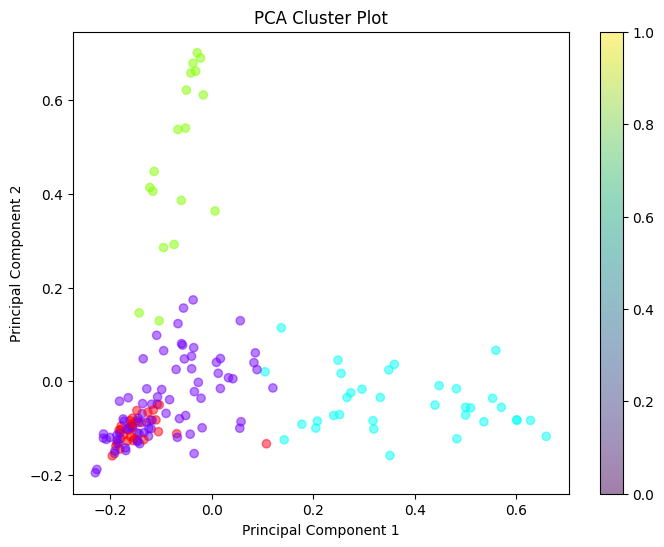

Cluster 0: oktober, barcode, terap, aplikasi, pedulilindungi, unjung, kota, balikpapan, more, covid
Cluster 1: sertifikat, chatbot, vaksin, pedulilindungi, whatsapp, adu, menu, vaksinasi, masyarakat, status
Cluster 2: satusehat, mobile, aplikasi, sehat, data, pedulilindungi, transformasi, platform, rekam, ubah
Cluster 3: aplikasi, pedulilindungi, sehat, masyarakat, vaksin, covid, layan, perintah, code, qr
Cluster 4: tumpang, bandara, terbang, formulir, udara, isi, tribunambon, aplikasi, pelni, sshp


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.cm as cm

# Prepare the data for TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(satusehat_news_df['content_stem_without_stopwords'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Set the number of clusters
n_clusters = 5

# Perform KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(tfidf_df)

# Evaluate clustering
silhouette_avg = silhouette_score(tfidf_df, clusters)
calinski_harabasz_avg = calinski_harabasz_score(tfidf_df, clusters)
davies_bouldin_avg = davies_bouldin_score(tfidf_df, clusters)

# Print the evaluation scores
print(f"\nSilhouette Score: {silhouette_avg:.4f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_avg:.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin_avg:.4f}")

def plot_pca(data, labels):
    # Convert DataFrame to NumPy array
    data_array = data.to_numpy()

    # Perform PCA on the entire dataset
    pca = PCA(n_components=2).fit_transform(data_array)

    # Create color labels based on clusters
    label_subset = [cm.hsv(i / max(labels)) for i in labels]

    # Plot PCA results
    plt.figure(figsize=(8, 6))
    plt.scatter(pca[:, 0], pca[:, 1], c=label_subset, alpha=0.5)
    plt.title('PCA Cluster Plot')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar()
    plt.show()

# Plot PCA
plot_pca(tfidf_df, clusters)

# Function to get top words for each cluster
def get_top_words_per_cluster(model, vectorizer, n_words=10):
    # Get the cluster centers
    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()

    # Display top words for each cluster
    top_words = {}
    for i in range(model.n_clusters):
        top_words[i] = [terms[ind] for ind in order_centroids[i, :n_words]]

    return top_words

# Get top words for each cluster
top_words_per_cluster = get_top_words_per_cluster(kmeans, tfidf_vectorizer)
for cluster, words in top_words_per_cluster.items():
    print(f"Cluster {cluster}: {', '.join(words)}")


# Word Embedding

## Word2Vec Set Up

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import numpy as np
import matplotlib.pyplot as plt
import nltk
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
satusehat_news_df

,link,judul,tanggal,portal,content,tags,status,tahun,wordCount,content_without_stopwords,wordcount_after_stopwords,content_stem_without_stopwords,wordcount_stem_without_stopwords,content_lemmatized,wordcount_lemmatized
0,https://cahayasiang.id/dinilai-peduli-lindungi...,"dinilai PeduliLindungi para pekerja, bpjs kete...",2024-09-22,Cahaya Siang,"dinilai PeduliLindungi para pekerja, bpjs ke...",Tidak ada tags,success,2024,481,dinilai PeduliLindungi pekerja bpjs ketenagake...,277,nilai pedulilindungi kerja bpjs ketenagakerjaa...,277,dinilai PeduliLindungi pekerja bpjs ketenagake...,277
1,https://memorandum.disway.id/read/114165/pemer...,pemerintah tingkatkan layanan haji dan umrah m...,2024-09-15,Memorandum.co.id,okt okt polrestabes surabaya menit pasuru...,"ketua fk patuh jatim,vaksin maningitis,satu se...",success,2024,458,okt okt polrestabes surabaya menit pasuruan ja...,286,okt okt polrestabes surabaya menit pasuruan ja...,286,okt okt polrestabes surabaya menit pasuruan ja...,286
2,https://www.bicaranetwork.com/kesehatan/295134...,tutorial cara isi formulir SatuSehat pasca pul...,2024-09-06,Bicara Network,bicaranetwork.com - guna menanggulangi penyeba...,"mpox, Satu Sehat, cara isi formulir",success,2024,355,bicaranetwork menanggulangi penyebaran penyaki...,203,bicaranetwork tanggulang sebar sakit cacar mon...,203,bicaranetwork menanggulangi penyebaran penyaki...,203
3,https://www.genpi.co/kesehatan/245752/bandara-...,bandara i gusti ngurah rai wajibkan penumpang ...,2024-09-06,GenPI.co,genpi.co - bandara i gusti ngurah rai bali mew...,"Berita terkini mpox, cacar monyet, Monkeypox,...",success,2024,217,genpi co bandara i gusti ngurah rai bali mewaj...,131,genpi co bandara i gusti ngurah rai bal wajib ...,131,genpi co bandara i gusti ngurah rai bali mewaj...,131
4,https://newsindonesia.co.id/read/berita-sumene...,"transformasi digital, rsud moh anwar sumenep b...",2024-02-01,newsindonesia.co.id,news indonesia . foto: direktur rumah saki...,Tidak ada tags,success,2024,539,news indonesia foto direktur rumah sakit daera...,292,news indonesia foto direktur rumah sakit daera...,292,news indonesia foto direktur rumah sakit daera...,292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,https://www.beritamerdekaonline.com/2021/07/pe...,perumahan tas blok m & n motto satgas “PeduliL...,2021-07-21,Berita Merdeka Online,"sidoarjo, beritamerdekaonline.com – kegiatan m...",Tidak ada tags,success,2021,691,sidoarjo beritamerdekaonline kegiatan mulia wa...,393,sidoarjo beritamerdekaonline giat mulia warga ...,386,sidoarjo beritamerdekaonline kegiatan mulia wa...,393
157,https://www.idxchannel.com/economics/masih-bin...,masih bingung? ini tips mudah download dan cet...,2021-07-12,IDX Channel,– diberlakukannya kebijakan pemberlakuan pemb...,"IDX, BEI, Pasar modal, Vakinsasi",success,2021,468,diberlakukannya kebijakan pemberlakuan pembata...,264,laku bijak laku batas giat masyarakat ppkm dar...,264,diberlakukannya kebijakan pemberlakuan pembata...,264
158,https://sehatnegeriku.kemkes.go.id/baca/umum/2...,kemenkes luncurkan qr code untuk aplikasi Pedu...,2021-07-01,Sehat Negeriku,"bali, juli kementerian kesehatan (kemenkes) ...",Tidak ada tags,success,2021,741,bali juli kementerian kesehatan kemenkes pemer...,421,bal juli menteri sehat kemenkes perintah daera...,421,bali juli kementerian kesehatan kemenkes pemer...,421
159,https://www.suara.com/health/2021/01/18/114052...,cara mendapatkan vaksin covid-19 gratis dari p...,2021-01-18,Suara.com,suara.com - seperti yang telah diketahui bersa...,"cara mendapatkan vaksin Covid-19 gratis, Vaksi...",success,2021,643,suara pelaksanaan program vaksinasi covid indo...,337,suara laksana program vaksinasi covid indonesi...,337,suara pelaksanaan program vaksinasi covid indo...,337


In [ ]:
import os
print(os.listdir('/content/'))

['.config', 'bow_satusehat_news.xlsx', 'idwiki_word2vec_300.model.wv.vectors.npy', 'bow_satusehat_news.csv', 'satusehat_news_df_cleaned.xlsx', 'cosine_satusehat_news.csv', 'idwiki_word2vec_300.model.trainables.syn1neg.npy', 'idwiki_word2vec_300.model', 'cosine_satusehat_news.xlsx', 'sample_data']


In [ ]:
from gensim.models import Word2Vec

# Try loading with gensim
model_path = "/content/idwiki_word2vec_300.model"
model = Word2Vec.load(model_path)

print(model.vector_size)  # Should print 300 if dimensions are correct

300


In [ ]:
# Tokenize the sentences
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in satusehat_news_df['content_stem_without_stopwords']]

# PreTrained Model
modelPre = Word2Vec.load("/content/idwiki_word2vec_300.model")
# Trained Model
modelTrain = Word2Vec(sentences=tokenized_sentences, window=5, min_count=1, workers=4)

# Save the model to a file
modelPre.save("word2vec_PreTrained")
modelTrain.save("word2vec_Trained")

## Word2Vec with PreTrained Model

In [ ]:
all_words_in_vocab = list(modelPre.wv.index_to_key)  # For newer gensim versions

print("Total words in vocabulary:", len(all_words_in_vocab))
print(all_words_in_vocab[:10])  # Print first 10 words as a sample

Total words in vocabulary: 392916
['dan', 'yang', 'di', 'dari', 'pada', 'ini', 'dengan', 'dalam', 'adalah', 'untuk']


In [ ]:
# Check if each word is in the vocabulary
words = ["pedulilindungi", "satusehat", "vaksin", "covid-19", "scan", "qr", "sehat", "aplikasi", "surat", "sertifikat", "pandemi", "covid"]
available_words = [word for word in words if word in modelPre.wv]
missing_words = [word for word in words if word not in modelPre.wv]

print("Available words:", available_words)
print("Missing words:", missing_words)

Available words: ['vaksin', 'scan', 'qr', 'sehat', 'aplikasi', 'surat', 'sertifikat', 'pandemi']
Missing words: ['pedulilindungi', 'satusehat', 'covid-19', 'covid']


In [ ]:
# Get vectors and words for plotting
words =['vaksin', 'scan', 'qr', 'sehat', 'aplikasi', 'surat', 'sertifikat', 'pandemi']
vectors = [modelPre.wv[word] for word in words]

### PCA for Selected Words and PreTrained Model

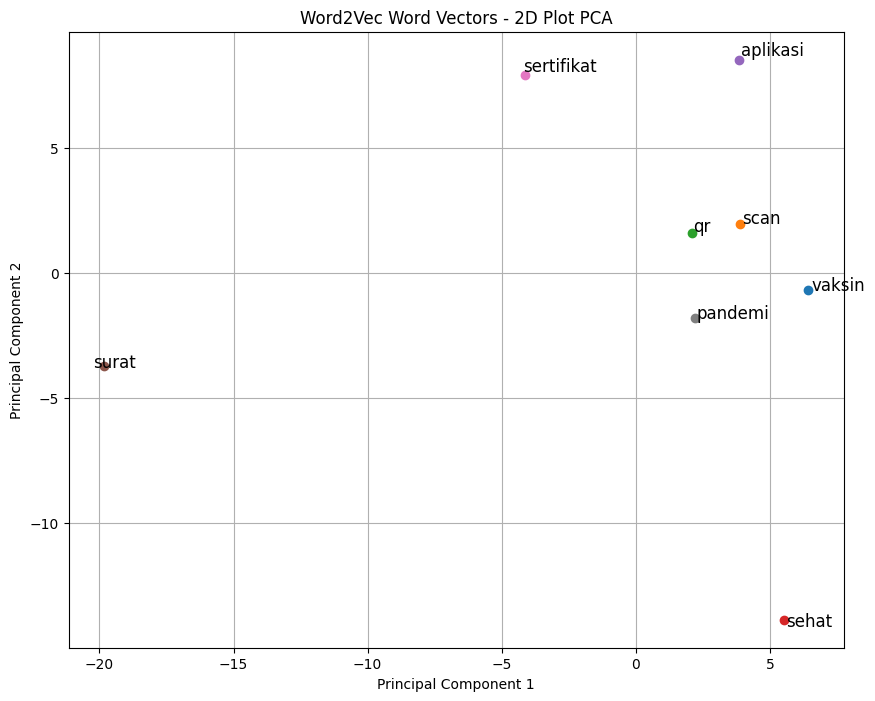

In [ ]:
# Perform PCA for dimensionality reduction
pakaiPCA = 1

if (pakaiPCA == 1):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(vectors)
    jsumbu = 'Principal '
else:
    # Apply t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    pca_result = tsne.fit_transform(vectors)
    jsumbu = 't-SNE '

# Plot the words in 2D
plt.figure(figsize=(10, 8))
for i, word in enumerate(words):
    x, y = pca_result[i, 0], pca_result[i, 1]
    plt.scatter(x, y)
    plt.text(x * 1.02, y * 1.02, word, fontsize=12)

plt.title('Word2Vec Word Vectors - 2D Plot PCA')
plt.xlabel(jsumbu + 'Component 1')
plt.ylabel(jsumbu + 'Component 2')
plt.grid(True)
plt.show()

### t-SNE for Selected Words and PreTrained Model

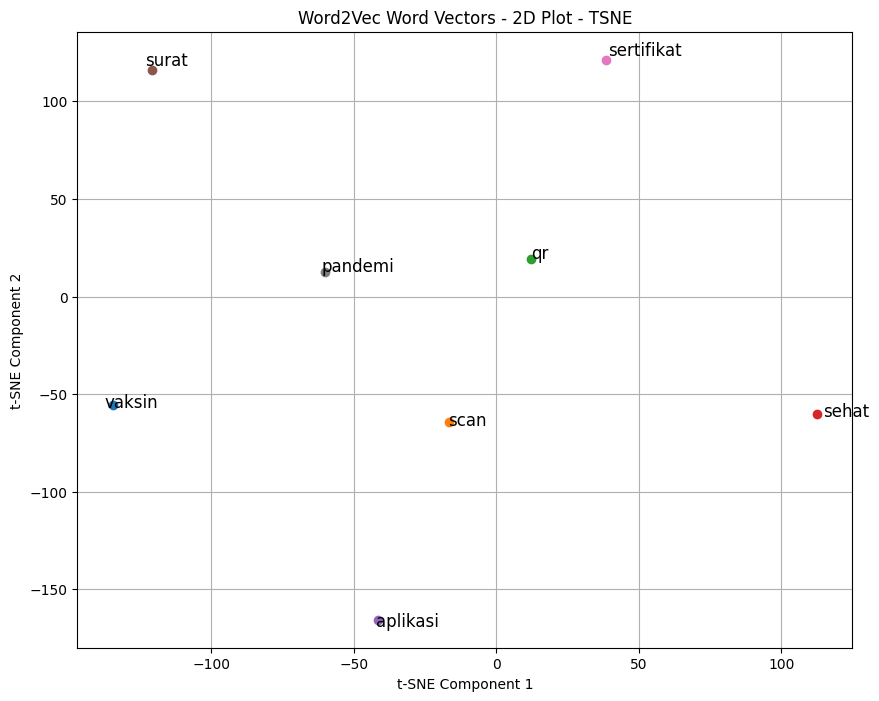

In [ ]:
#Not Using PCA for dimensionality reduction
pakaiPCA = 0
vectors = [modelPre.wv[word] for word in words]
vectors = np.array(vectors)  # Convert list of vectors to a NumPy array

if (pakaiPCA == 1):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(vectors)
    jsumbu = 'Principal '
else:
    # Apply t-SNE
    tsne = TSNE(n_components=2, random_state=42, perplexity=4)
    pca_result = tsne.fit_transform(vectors)
    jsumbu = 't-SNE '

# Plot the words in 2D
plt.figure(figsize=(10, 8))
for i, word in enumerate(words):
    x, y = pca_result[i, 0], pca_result[i, 1]
    plt.scatter(x, y)
    plt.text(x * 1.02, y * 1.02, word, fontsize=12)

plt.title('Word2Vec Word Vectors - 2D Plot - TSNE')
plt.xlabel(jsumbu + 'Component 1')
plt.ylabel(jsumbu + 'Component 2')
plt.grid(True)
plt.show()

## Word2Vec with Trained Model

In [ ]:
all_words_in_vocab = list(modelTrain.wv.index_to_key)  # For newer gensim versions

print("Total words in vocabulary:", len(all_words_in_vocab))
print(all_words_in_vocab[:10])  # Print first 10 words as a sample

Total words in vocabulary: 4601
['aplikasi', 'pedulilindungi', 'sehat', 'masyarakat', 'satusehat', 'vaksin', 'data', 'layan', 'covid', 'sertifikat']


In [ ]:
# Check if each word is in the vocabulary
words = ["PeduliLindungi", "SatuSehat", "vaksin", "covid-19", "scan", "qr", "sehat", "aplikasi", "surat", "sertifikat", "pandemi"]
available_words = [word for word in words if word in modelTrain.wv]
missing_words = [word for word in words if word not in modelTrain.wv]

print("Available words:", available_words)
print("Missing words:", missing_words)

Available words: ['vaksin', 'scan', 'qr', 'sehat', 'aplikasi', 'surat', 'sertifikat', 'pandemi']
Missing words: ['PeduliLindungi', 'SatuSehat', 'covid-19']


### PCA for Selected Words and Trained Model

In [ ]:
# Get vectors and words for plotting
words =["pedulilindungi", "satusehat", "vaksin", "covid", "scan", "qr", "sehat", "aplikasi", "surat", "sertifikat", "pandemi"]
vectors = [modelTrain.wv[word] for word in words]

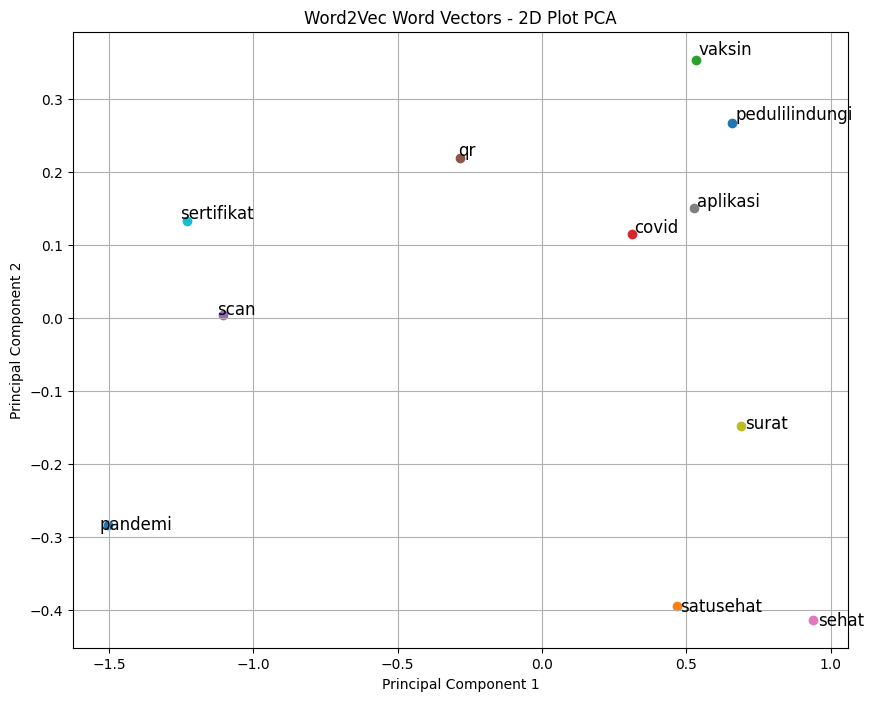

In [ ]:
# Perform PCA for dimensionality reduction
pakaiPCA = 1

vectors = np.array(vectors)  # Convert list of vectors to a NumPy array

if (pakaiPCA == 1):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(vectors)
    jsumbu = 'Principal '
else:
    # Apply t-SNE
    tsne = TSNE(n_components=2, random_state=42, perplexity = 5)
    pca_result = tsne.fit_transform(vectors)
    jsumbu = 't-SNE '

# Plot the words in 2D
plt.figure(figsize=(10, 8))
for i, word in enumerate(words):
    x, y = pca_result[i, 0], pca_result[i, 1]
    plt.scatter(x, y)
    plt.text(x * 1.02, y * 1.02, word, fontsize=12)

plt.title('Word2Vec Word Vectors - 2D Plot PCA')
plt.xlabel(jsumbu + 'Component 1')
plt.ylabel(jsumbu + 'Component 2')
plt.grid(True)
plt.show()

### PCA All Words

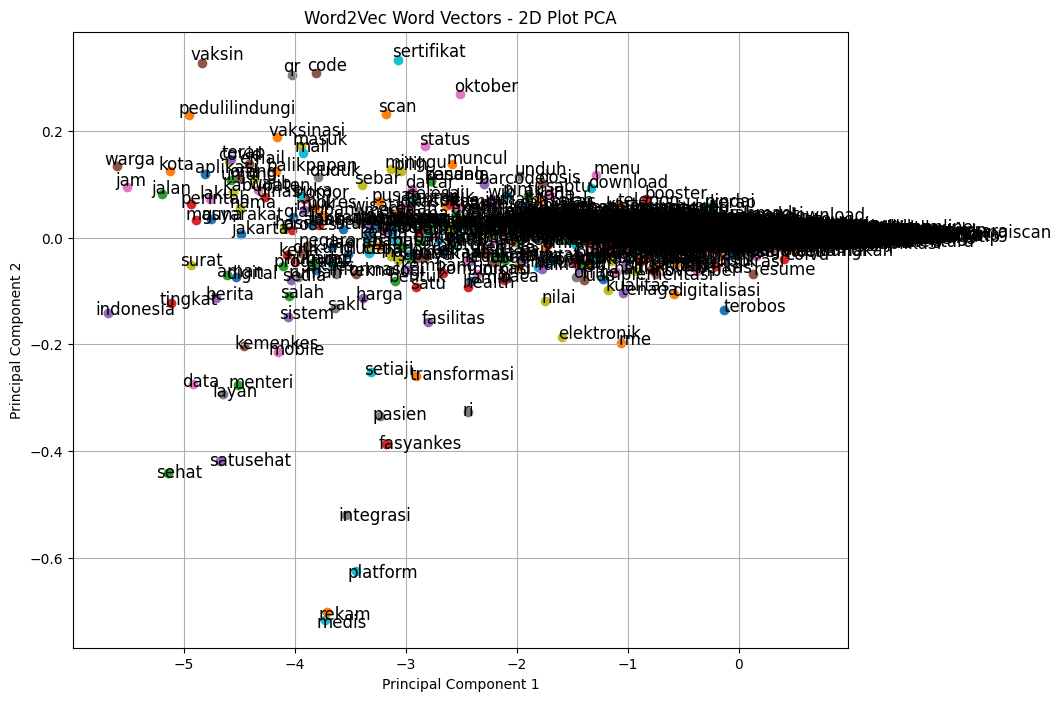

In [ ]:
# Retrieve all words from the model's vocabulary
words = list(modelTrain.wv.index_to_key)  # `index_to_key` contains all words in the model's vocabulary

# Get vectors for all words
vectors = [modelTrain.wv[word] for word in words]

pakaiPCA = 1

if (pakaiPCA == 1):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(vectors)
    jsumbu = 'Principal '
else:
    # Apply t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    pca_result = tsne.fit_transform(vectors)
    jsumbu = 't-SNE '

# Plot the words in 2D
plt.figure(figsize=(10, 8))
for i, word in enumerate(words):
    x, y = pca_result[i, 0], pca_result[i, 1]
    plt.scatter(x, y)
    plt.text(x * 1.02, y * 1.02, word, fontsize=12)

plt.title('Word2Vec Word Vectors - 2D Plot PCA')
plt.xlabel(jsumbu + 'Component 1')
plt.ylabel(jsumbu + 'Component 2')
plt.grid(True)
plt.show()

### t-SNE for Selected Words and Trained Model

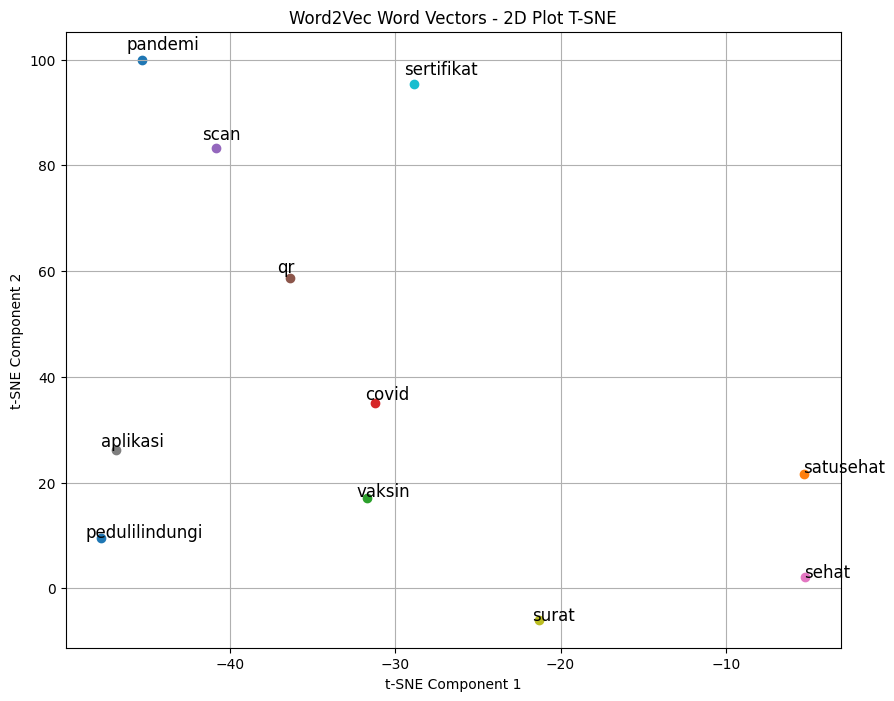

In [ ]:
pakaiPCA = 0
words =["pedulilindungi", "satusehat", "vaksin", "covid", "scan", "qr", "sehat", "aplikasi", "surat", "sertifikat", "pandemi"]
vectors = [modelTrain.wv[word] for word in words]
vectors = np.array(vectors)  # Convert list of vectors to a NumPy array

if (pakaiPCA == 1):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(vectors)
    jsumbu = 'Principal '
else:
    # Apply t-SNE
    tsne = TSNE(n_components=2, random_state=42, perplexity = 5)
    pca_result = tsne.fit_transform(vectors)
    jsumbu = 't-SNE '

# Plot the words in 2D
plt.figure(figsize=(10, 8))
for i, word in enumerate(words):
    x, y = pca_result[i, 0], pca_result[i, 1]
    plt.scatter(x, y)
    plt.text(x * 1.02, y * 1.02, word, fontsize=12)

plt.title('Word2Vec Word Vectors - 2D Plot T-SNE')
plt.xlabel(jsumbu + 'Component 1')
plt.ylabel(jsumbu + 'Component 2')
plt.grid(True)
plt.show()

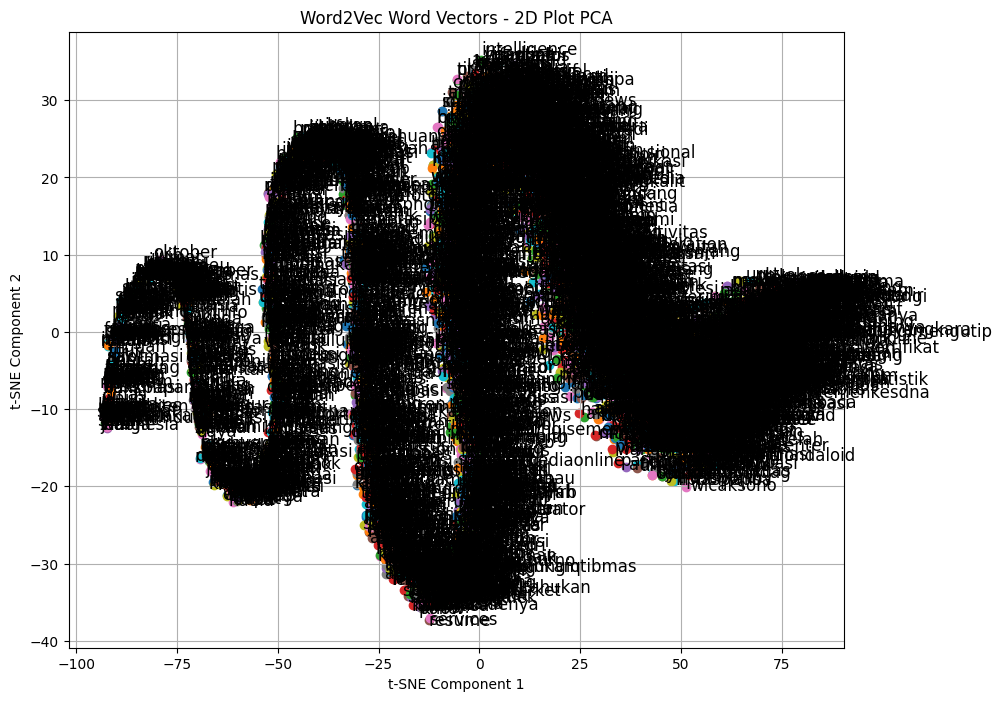

In [ ]:
# Retrieve all words from the model's vocabulary
words = list(modelTrain.wv.index_to_key)  # `index_to_key` contains all words in the model's vocabulary

# Get vectors for all words
vectors = [modelTrain.wv[word] for word in words]

pakaiPCA = 0
vectors = np.array(vectors)  # Convert list of vectors to a NumPy array

if (pakaiPCA == 1):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(vectors)
    jsumbu = 'Principal '
else:
    # Apply t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    pca_result = tsne.fit_transform(vectors)
    jsumbu = 't-SNE '

# Plot the words in 2D
plt.figure(figsize=(10, 8))
for i, word in enumerate(words):
    x, y = pca_result[i, 0], pca_result[i, 1]
    plt.scatter(x, y)
    plt.text(x * 1.02, y * 1.02, word, fontsize=12)

plt.title('Word2Vec Word Vectors - 2D Plot PCA')
plt.xlabel(jsumbu + 'Component 1')
plt.ylabel(jsumbu + 'Component 2')
plt.grid(True)
plt.show()

# Clustering menggunakan Vector Embedding

In [ ]:
# List of all words in the model's vocabulary
words = list(modelTrain.wv.index_to_key)  # Mengambil semua kata dari vocabulary
words

['aplikasi',
 'pedulilindungi',
 'sehat',
 'masyarakat',
 'satusehat',
 'vaksin',
 'data',
 'layan',
 'covid',
 'sertifikat',
 'guna',
 'vaksinasi',
 'menteri',
 'perintah',
 'indonesia',
 'kemenkes',
 'mobile',
 'integrasi',
 'masuk',
 'platform',
 'akses',
 'kota',
 'jalan',
 'nomor',
 'terap',
 'warga',
 'laku',
 'qr',
 'nama',
 'medis',
 'fitur',
 'ubah',
 'salah',
 'tingkat',
 'sistem',
 'code',
 'wajib',
 'informasi',
 'surat',
 'setiaji',
 'digital',
 'rekam',
 'aman',
 'hubung',
 'milik',
 'orang',
 'daftar',
 'ri',
 'id',
 'laksana',
 'mudah',
 'transformasi',
 'unjung',
 'fasyankes',
 'sedia',
 'email',
 'jam',
 'pasien',
 'hasil',
 'mall',
 'jakarta',
 'pusat',
 'program',
 'dinas',
 'fasilitas',
 'publik',
 'status',
 'sakit',
 'sebar',
 'whatsapp',
 'giat',
 'scan',
 'harap',
 'proses',
 'berita',
 'manfaat',
 'kendala',
 'duduk',
 'kabupaten',
 'cepat',
 'daerah',
 'muncul',
 'sesuai',
 'langsung',
 'bantu',
 'teknologi',
 'oktober',
 'rumah',
 'resmi',
 'buka',
 'protoko

In [ ]:
# Mendapatkan Vektor Embedding dari Vocabulary
vectors = [modelTrain.wv[word] for word in words]  # Mengambil vektor embedding untuk setiap kata
vectors = np.array(vectors)

## Menentukan Jumlah Klaster Optimal

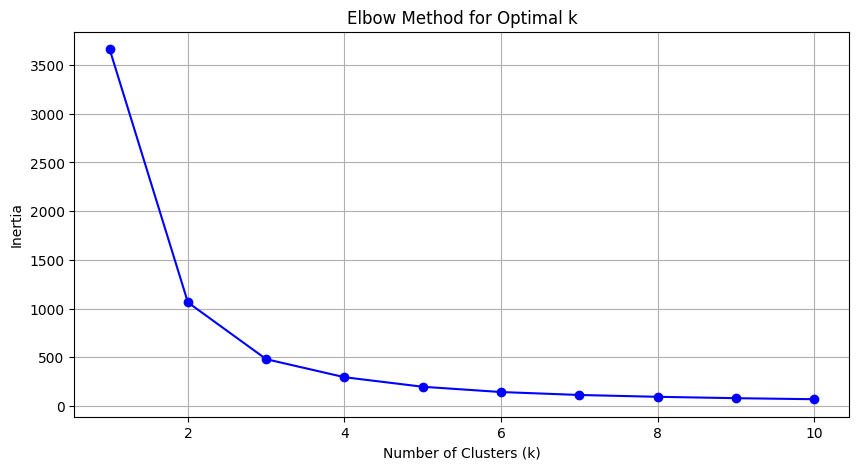

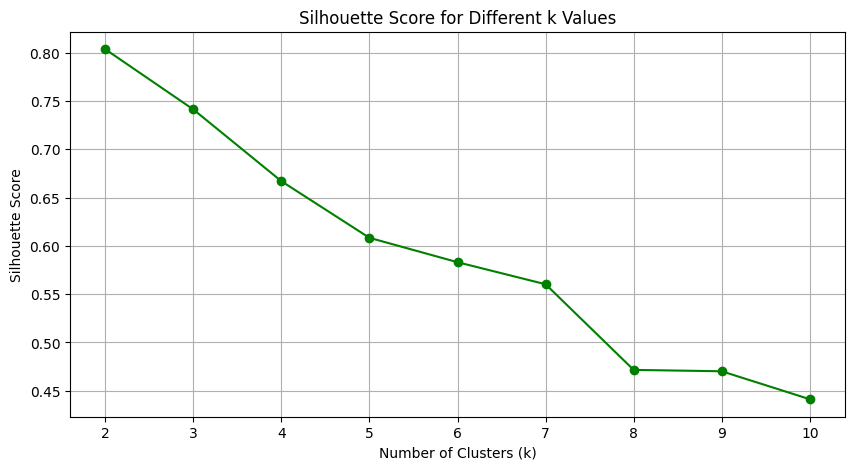

In [ ]:
# Loop untuk mencari nilai inertia dari beberapa jumlah klaster yang berbeda
inertias = []
silhouette_scores = []
k_values = range(1, 11)  # Mengevaluasi antara 1 sampai 10 klaster

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(vectors)
    inertias.append(kmeans.inertia_)

    # Hitung silhouette score hanya jika jumlah klaster > 1
    if k > 1:
        score = silhouette_score(vectors, kmeans.labels_)
        silhouette_scores.append(score)

# Visualisasi Metode Elbow
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertias, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()

# Visualisasi Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(k_values[1:], silhouette_scores, 'go-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different k Values")
plt.grid(True)
plt.show()

## Clustering menggunakan K-Means

K-Means adalah algoritma klastering yang digunakan untuk mengelompokkan data ke dalam k kluster berdasarkan kedekatan (similarity) data dalam ruang vektor. K-Means bekerja dengan cara iteratif untuk meminimalkan jarak antar data dalam satu kluster.

In [ ]:
# Melakukan Klastering dengan K-Means
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(vectors)

KMeans(n_clusters=2, random_state=42)

In [ ]:
from collections import defaultdict

# Membuat dan Menampilkan Hasil Klastering
# Mengelompokkan kata berdasarkan label klaster
labels = kmeans.labels_
clusters = defaultdict(list)

for word, label in zip(words, labels):
    clusters[label].append(word)

# Menampilkan hasil klastering
for cluster_id, cluster_words in clusters.items():
    print(f"Cluster {cluster_id}: {cluster_words}")

# Evaluasi Metrik pada Klaster Terpilih
silhouette_avg = silhouette_score(vectors, labels)
calinski_harabasz_avg = calinski_harabasz_score(vectors, labels)
davies_bouldin_avg = davies_bouldin_score(vectors, labels)

# Tampilkan hasil evaluasi
print(f"Silhouette Score: {silhouette_avg:.4f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_avg:.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin_avg:.4f}")

Cluster 1: ['aplikasi', 'pedulilindungi', 'sehat', 'masyarakat', 'satusehat', 'vaksin', 'data', 'layan', 'covid', 'sertifikat', 'guna', 'vaksinasi', 'menteri', 'perintah', 'indonesia', 'kemenkes', 'mobile', 'integrasi', 'masuk', 'platform', 'akses', 'kota', 'jalan', 'nomor', 'terap', 'warga', 'laku', 'qr', 'nama', 'medis', 'fitur', 'ubah', 'salah', 'tingkat', 'sistem', 'code', 'wajib', 'informasi', 'surat', 'setiaji', 'digital', 'rekam', 'aman', 'hubung', 'milik', 'orang', 'daftar', 'ri', 'id', 'laksana', 'mudah', 'transformasi', 'unjung', 'fasyankes', 'sedia', 'email', 'jam', 'pasien', 'hasil', 'mall', 'jakarta', 'pusat', 'program', 'dinas', 'fasilitas', 'publik', 'status', 'sakit', 'sebar', 'whatsapp', 'giat', 'scan', 'harap', 'proses', 'berita', 'manfaat', 'kendala', 'duduk', 'kabupaten', 'cepat', 'daerah', 'muncul', 'sesuai', 'langsung', 'bantu', 'teknologi', 'oktober', 'rumah', 'resmi', 'buka', 'protokol', 'balikpapan', 'upaya', 'satu', 'kembang', 'dukung', 'pandemi', 'unduh', 'pi

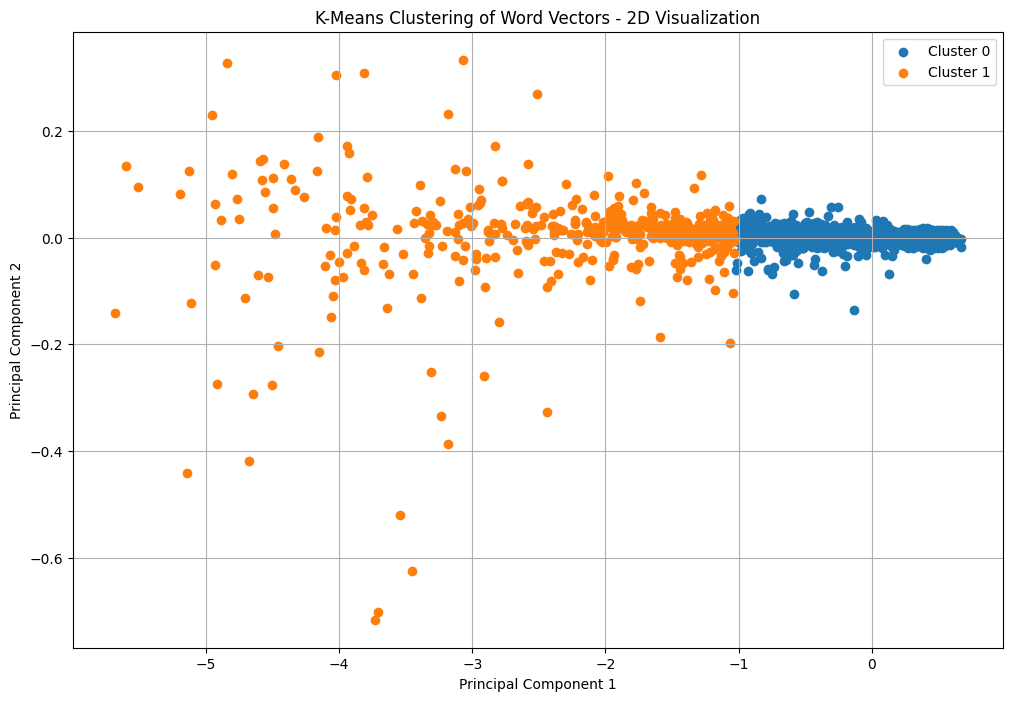

In [ ]:
# Visualisasi Hasil Klastering dalam 2D
# Gunakan PCA untuk mengurangi dimensi menjadi 2D
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

# Plotting klaster
plt.figure(figsize=(12, 8))
for i in range(optimal_k):
    cluster_points = reduced_vectors[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')

plt.legend()
plt.title('K-Means Clustering of Word Vectors - 2D Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

## BoW menggunakan Vector Embedding

Kluster 0: 4143 kata
Kluster 1: 437 kata

Kata yang paling sering muncul dalam setiap kluster:
Kluster 0: aan, aang, abadi, abai, abbas, abdul, abdullah, abi, abidin, absensi
Kluster 1: adu, agus, air, aju, akbp, akses, aku, akun, al, alamat

Silhouette Score (untuk kata dalam vektor embedding): 0.804
Calinski Score (untuk kata dalam vektor embedding): 11068.902
Davies Score (untuk kata dalam vektor embedding): 0.476


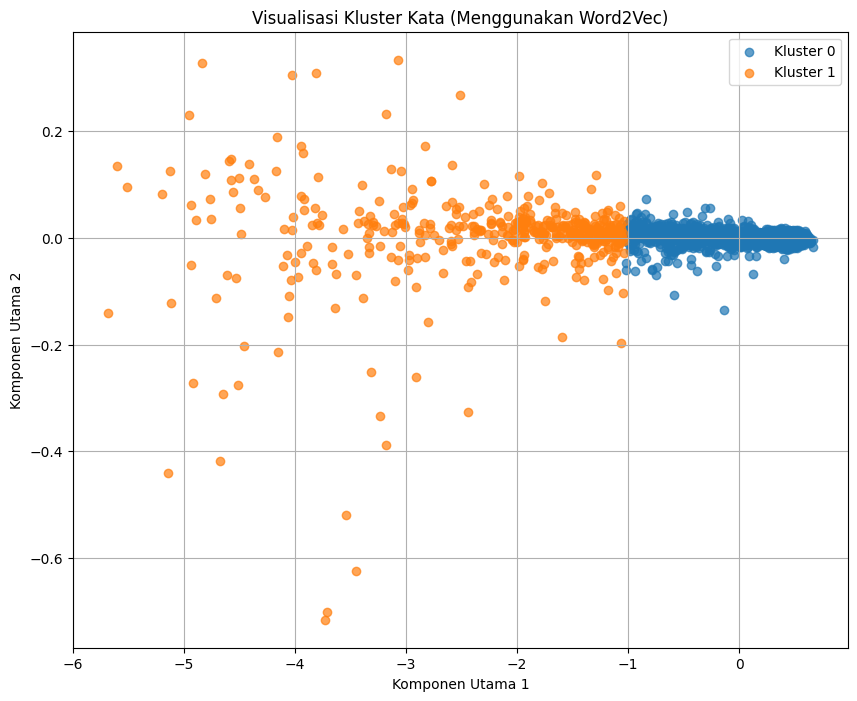

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

# Misalkan modelTrain adalah model Word2Vec yang sudah dilatih
# Ambil kolom 'content_stem_without_stopwords' untuk representasi BoW
documents = satusehat_news_bow['content_stem_without_stopwords']

# Menggunakan CountVectorizer untuk membuat representasi Bag of Words
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

# Mendapatkan nama fitur kata (kosakata)
words = vectorizer.get_feature_names_out()

# Mengambil vektor embedding untuk setiap kata
vectors = np.array([modelTrain.wv[word] for word in words])  # Mengambil vektor embedding untuk setiap kata

# Tentukan jumlah kluster untuk kata-kata
num_clusters = 2

# Lakukan klustering KMeans pada vektor kata
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(vectors)
word_cluster_labels = kmeans.labels_

# Menampilkan jumlah kata dalam setiap kluster
class_counts = Counter(word_cluster_labels)
for label, count in class_counts.items():
    print(f"Kluster {label}: {count} kata")

# Menampilkan kata yang paling sering muncul dalam setiap kluster
print("\nKata yang paling sering muncul dalam setiap kluster:")
for i in range(num_clusters):
    # Mendapatkan kata-kata dalam kluster saat ini
    cluster_words = [words[j] for j in range(len(words)) if word_cluster_labels[j] == i]

    # Menghitung frekuensi kemunculan kata dalam kluster saat ini
    word_frequencies = Counter(cluster_words)

    # Menampilkan 10 kata paling sering dalam kluster saat ini
    most_common_words = word_frequencies.most_common(10)
    print(f"Kluster {i}: {', '.join([word for word, freq in most_common_words])}")

# Mengevaluasi klustering menggunakan silhouette score
silhouette_avg = silhouette_score(vectors, word_cluster_labels)
calinski_harabasz_avg = calinski_harabasz_score(vectors, word_cluster_labels)
davies_bouldin_avg = davies_bouldin_score(vectors, word_cluster_labels)
print(f"\nSilhouette Score (untuk kata dalam vektor embedding): {silhouette_avg:.3f}")
print(f"Calinski Score (untuk kata dalam vektor embedding): {calinski_harabasz_avg:.3f}")
print(f"Davies Score (untuk kata dalam vektor embedding): {davies_bouldin_avg:.3f}")

#=============================================
# Visualisasi Kluster dengan PCA
#=============================================

# Mengurangi dimensi untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(vectors)

# Memvisualisasikan kluster kata
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    cluster_points = X_pca[word_cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Kluster {i}', alpha=0.7)

plt.title('Visualisasi Kluster Kata (Menggunakan Word2Vec)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.legend()
plt.grid()
plt.show()


## Cosine BoW menggunakan Vector Embedding


Bag of Words shape: (161, 4580)

Top terms in each cluster (BoW):
Cluster 0: admin, adu, alamat, aceh, address, achmad, afdba, adaptasi, adaptif, adolikasi
Cluster 1: anatara, ak, alamat, agama, amfiteater, akibat, admin, ajak, aceh, adaptif

Silhouette Score (BoW): 0.2779977658605338
Calinski-Harabasz Score (BoW): 78.84900928746515
Davies-Bouldin Score (BoW): 1.382062997379796

Top terms in each cluster (Word Embeddings):
Cluster 0: atur, gelar, jalan, kepala, media, usaha, no, bangun, proses, jaga
Cluster 1: polda, diany, ganti, bpjs, hubung, tarik, login, masalah, umum, redaksi

Silhouette Score (Word Embeddings): 0.8571406006813049
Calinski-Harabasz Score (Word Embeddings): 6464.75974373236
Davies-Bouldin Score (Word Embeddings): 0.5286644400694878


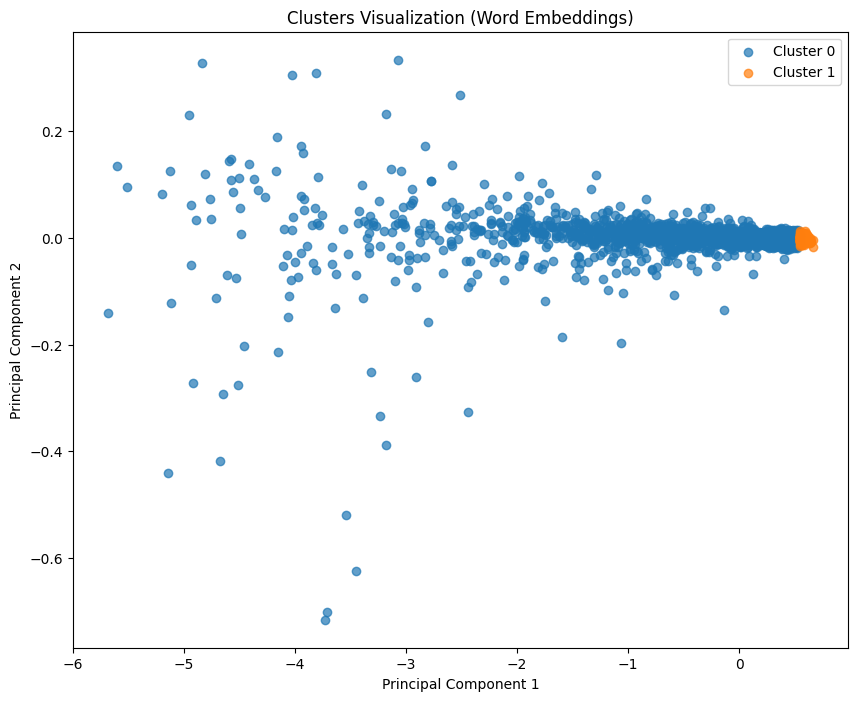

Class 0: 4418 instances
Class 1: 162 instances


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from collections import Counter
from scipy.sparse import issparse
from sklearn.metrics.pairwise import cosine_similarity

# Assuming satusehat_news_df and modelTrain are already defined
documents = satusehat_news_df['content_stem_without_stopwords']

# Create a CountVectorizer to create a bag of words representation
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

# Save cosine to Excel and CSV
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
bow_df.to_excel("cosine_satusehat_news.xlsx", index=False)
bow_df.to_csv("cosine_satusehat_news.csv", index=False)

# Print the bag of words shape
print("\nBag of Words shape:", X.shape)

# Calculate cosine similarity based on BoW
cosine_sim_bow = cosine_similarity(X, X)

# Number of clusters (adjust as needed)
num_clusters = 2

# Perform KMeans clustering using cosine similarity from BoW
kmeans_bow = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_bow.fit(cosine_sim_bow)

# Get cluster labels for each document
cluster_labels_bow = kmeans_bow.labels_

# Print the top terms in each cluster (optional)
print("\nTop terms in each cluster (BoW):")
order_centroids = kmeans_bow.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(num_clusters):
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]  # Print top 10 terms per cluster
    print(f"Cluster {i}: {', '.join(top_terms)}")

# Evaluate the clustering using various metrics
silhouette_avg_bow = silhouette_score(cosine_sim_bow, cluster_labels_bow)
calinski_harabasz_avg_bow = calinski_harabasz_score(cosine_sim_bow, cluster_labels_bow)
davies_bouldin_avg_bow = davies_bouldin_score(cosine_sim_bow, cluster_labels_bow)

# Print the evaluation scores
print(f"\nSilhouette Score (BoW): {silhouette_avg_bow}")
print(f"Calinski-Harabasz Score (BoW): {calinski_harabasz_avg_bow}")
print(f"Davies-Bouldin Score (BoW): {davies_bouldin_avg_bow}")

# =============================
# Mendapatkan Vektor Embedding dari Vocabulary
# =============================

# Mendapatkan kata dari BoW
words = vectorizer.get_feature_names_out()

# Mengambil vektor embedding untuk setiap kata
vectors = np.array([modelTrain.wv[word] for word in words])  # Mengambil vektor embedding untuk setiap kata

# Menghitung cosine similarity dari vektor embedding
cosine_sim_vectors = cosine_similarity(vectors)

# Lakukan KMeans clustering menggunakan cosine similarity dari vektor embedding
kmeans_vectors = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_vectors.fit(cosine_sim_vectors)

# Get cluster labels for each word
cluster_labels_vectors = kmeans_vectors.labels_

# Print the top terms in each cluster (optional) for vectors
print("\nTop terms in each cluster (Word Embeddings):")
order_centroids_vectors = kmeans_vectors.cluster_centers_.argsort()[:, ::-1]
for i in range(num_clusters):
    top_terms_vectors = [words[ind] for ind in order_centroids_vectors[i, :10]]  # Print top 10 terms per cluster
    print(f"Cluster {i}: {', '.join(top_terms_vectors)}")

# Evaluate the clustering using various metrics for vectors
silhouette_avg_vectors = silhouette_score(cosine_sim_vectors, cluster_labels_vectors)
calinski_harabasz_avg_vectors = calinski_harabasz_score(cosine_sim_vectors, cluster_labels_vectors)
davies_bouldin_avg_vectors = davies_bouldin_score(cosine_sim_vectors, cluster_labels_vectors)

# Print the evaluation scores for vectors
print(f"\nSilhouette Score (Word Embeddings): {silhouette_avg_vectors}")
print(f"Calinski-Harabasz Score (Word Embeddings): {calinski_harabasz_avg_vectors}")
print(f"Davies-Bouldin Score (Word Embeddings): {davies_bouldin_avg_vectors}")

# Reduce dimensionality for visualization of word clusters
pca = PCA(n_components=2)
X_pca_vectors = pca.fit_transform(vectors)

# Plot the clusters for word embeddings
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    cluster_points = X_pca_vectors[cluster_labels_vectors == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}', alpha=0.7)

plt.title('Clusters Visualization (Word Embeddings)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Count occurrences of each cluster label for words
class_counts_vectors = Counter(cluster_labels_vectors)

# Print the count of each class label for words
for label, count in class_counts_vectors.items():
    print(f"Class {label}: {count} instances")


## Word2Vec untuk Clustering


Silhouette Score: 0.5830
Calinski-Harabasz Score: 385.1060
Davies-Bouldin Score: 0.5532


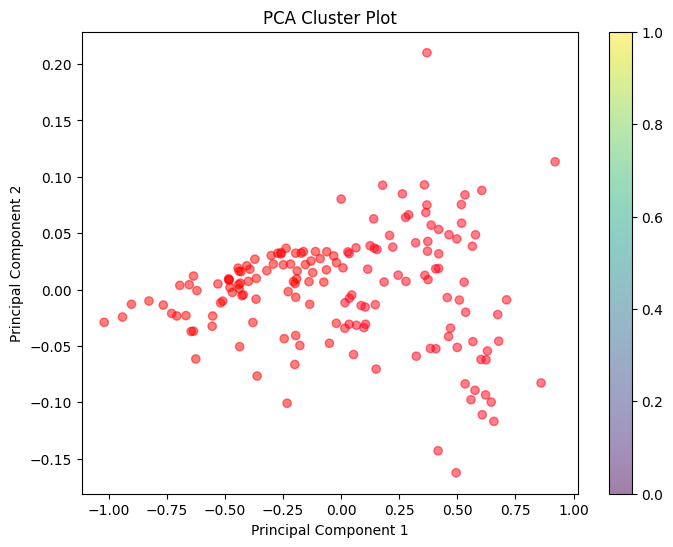

In [ ]:
# Assuming modelTrain is your trained Word2Vec model and satusehat_news_df is defined

# Create document vectors by averaging word embeddings
def get_document_vector(doc):
    word_vectors = []
    for word in doc.split():
        if word in modelTrain.wv:
            word_vectors.append(modelTrain.wv[word])
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(modelTrain.vector_size)

# Create a document vector for each content in the DataFrame
satusehat_news_df['doc_vector'] = satusehat_news_df['content_stem_without_stopwords'].apply(get_document_vector)

# Convert document vectors to a NumPy array
doc_vectors = np.array(satusehat_news_df['doc_vector'].tolist())

# Set the number of clusters
n_clusters = 2

# Perform KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(doc_vectors)

# Evaluate clustering
silhouette_avg = silhouette_score(doc_vectors, clusters)
calinski_harabasz_avg = calinski_harabasz_score(doc_vectors, clusters)
davies_bouldin_avg = davies_bouldin_score(doc_vectors, clusters)

# Print the evaluation scores
print(f"\nSilhouette Score: {silhouette_avg:.4f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_avg:.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin_avg:.4f}")

# Function to plot PCA (similar to the previous code)
plot_pca(pd.DataFrame(doc_vectors), clusters)

# Get top words for each cluster (This may require adjustments to reflect the use of embeddings)
# You can consider using the original words from the documents or analyze the embeddings differently
